<h1>Multi Analysis Sales Data</h1>

<hr>


* [1. Dataset description](#description)
* [2. Preliminary steps](#needs)
    * [2.1. Import Libraries](#import)
    * [2.2. Import Dataset](#import2)
* [3. Data Understanding](#understand) 
* [4. Data Preparation](#preparation) 
    * [4.1. Missing Values](#missing)
    * [4.2. Duplicate Values](#duplicate)
    * [4.3. Correcting Error](#errors)
    * [4.2. Data Transformation](#transformation) 
* [5. Data Analysis](#analysis)
    * [5.1. Data Distribution](#distribution)
    * [5.2. Outliers](#outliers)
    * [5.3. Other Analysis](#other)
        * [5.3.1. Customer Churn Analytics](#churn)     
        * [5.3.2. Demand Fluctuation Forecasting Analysis](#fluctuation)
        * [5.3.3. Customer Segmentation Analysis for Personalized Marketing](#segmentation)
        * [5.3.4. Price Elasticity Analysis](#elasticity)
        * [5.3.5. Consumer Preference Analysis by Demographic Factors](#preference)
        * [5.3.6. Analyzing Consumer Purchasing Trends Over Time](#purchasing)
        * [5.3.7. Geospatial Distribution Analysis](#geospatial)
        * [5.3.8. Sales Trend Analysis by Time](#sales)
        * [5.3.9. Product Distribution Performance Analysis](#performance)
        * [5.3.10. Product Variant Sales Analysis](#variant)
* [6. Models](#model) 
    * [6.1. Demand Forecasting Optimization Using Exponential Smoothing](#optimization)
* [7. About the Author](#about) 

<a id="description">
    
# 1. Dataset description
    
</a>

1. **order_id**: A unique identifier for each order placed.
2. **order_date**: The date on which the order was placed.
3. **status**: The status of the order (e.g., completed, pending, canceled).
4. **item_id**: A unique identifier for each item in the order.
5. **sku**: Stock Keeping Unit; a unique code for identifying each product.
6. **quantity_ordered**: The quantity of the item ordered in a single order.
7. **price**: The price of a single unit of the item.
8. **value**: The total value of the items ordered (calculated as `quantity_ordered * price`).
9. **discount_amount**: The total discount applied to the order.
10. **total_sales**: The total amount received for the order after discounts.
11. **category**: The category or type of the product (e.g., electronics, clothing).
12. **payment_method**: The method used to pay for the order (e.g., credit card, PayPal).
13. **bi_st**: Likely refers to a business intelligence state or custom field (needs clarification).
14. **customer_id**: A unique identifier for each customer.
15. **year**: The year in which the order was placed.
16. **month**: The month in which the order was placed.
17. **ref_num**: Reference number for tracking the order or transaction.
18. **Name Prefix**: Prefix of the customer's name (e.g., Mr., Ms., Dr.).
19. **First Name**: The customer's first name.
20. **Middle Initial**: The customer's middle initial (if applicable).
21. **Last Name**: The customer's last name.
22. **Gender**: The gender of the customer (e.g., Male, Female).
23. **age**: The age of the customer.
24. **full_name**: The full name of the customer (combining first, middle, and last names).
25. **E Mail**: The customer's email address.
26. **Customer Since**: The date when the customer first registered or made a purchase.
27. **SSN**: The customer's Social Security Number (sensitive information).
28. **Phone No.**: The customer's phone number.
29. **Place Name**: The name of the locality associated with the customer.
30. **County**: The county where the customer resides.
31. **City**: The city where the customer resides.
32. **State**: The state where the customer resides.
33. **Zip**: The postal/ZIP code of the customer's address.
34. **Region**: The geographic region where the customer is located (e.g., Northeast, West).
35. **User Name**: The username of the customer (for online accounts).
36. **Discount_Percent**: The percentage discount applied to the order.

<hr>
<a id="needs">
    
# 2. Preliminary steps
    
</a>

<a  id="import">

## 2.1. Import Libraries

</a>

In [102]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import plotly.express as px
import squarify
import geopandas as gpd
import fiona
import os
import re
import datetime
import sys
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy import stats
import scikitplot as skplt
from scipy.stats import norm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
import joblib
from joblib import dump
import warnings
warnings.filterwarnings('ignore')

<a id="import2">

## 2.2. Import Dataset
</a>

In [103]:
df = pd.read_csv("D:/dataset/sales.csv")

<a id="understand">
    
# 3. Data Understanding
    
</a>

In [104]:
df

order_id  order_date      status   item_id                    sku  \
0       100354678  2020-10-01    received  574772.0     oasis_Oasis-064-36   
1       100354678  2020-10-01    received  574774.0        Fantastic_FT-48   
2       100354680  2020-10-01    complete  574777.0        mdeal_DMC-610-8   
3       100354680  2020-10-01    complete  574779.0     oasis_Oasis-061-36   
4       100367357  2020-11-13    received  595185.0    MEFNAR59C38B6CA08CD   
...           ...         ...         ...       ...                    ...   
286387  100562365  2021-09-30        paid  905179.0    APPCHA5AF14939B8F8A   
286388  100562376  2021-09-30         cod  905191.0    MEFCOT5A8D1E973B886   
286389  100562383  2021-09-30         cod  905200.0  WOFVAL59D5EA84167F9-M   
286390  100562384  2021-09-30         cod  905202.0  WOFNIG5B4D7EB0E9FDD-L   
286391  100562386  2021-09-30  processing  905205.0    MATHUA5AF70A7D1E50A   

        qty_ordered   price   value  discount_amount   total  ...  \
0              21.0    89.9  1798.0              0.0  1798.0  ...   
1              11.0    19.0   190.0              0.0   190.0  ...   
2               9.0   149.9  1199.2              0.0  1199.2  ...   
3               9.0    79.9   639.2              0.0   639.2  ...   
4               2.0    99.9    99.9              0.0    99.9  ...   
...             ...     ...     ...              ...     ...  ...   
286387          2.0  4419.9  4419.9              0.0  4419.9  ...   
286388          2.0    39.9    39.9              0.0    39.9  ...   
286389          2.0    40.0    40.0              0.0    40.0  ...   
286390          2.0    49.9    49.9              0.0    49.9  ...   
286391          2.0  3559.9  3559.9              0.0  3559.9  ...   

                SSN    Phone No.      Place Name    County           City  \
0       627-31-5251  405-959-1129         Vinson    Harmon         Vinson   
1       627-31-5251  405-959-1129         Vinson    Harmon         Vinson   
2       627-31-5251  405-959-1129         Vinson    Harmon         Vinson   
3       627-31-5251  405-959-1129         Vinson    Harmon         Vinson   
4       627-31-5251  405-959-1129         Vinson    Harmon         Vinson   
...             ...           ...            ...       ...            ...   
286387  613-87-0361  212-772-7404      Rushville     Yates      Rushville   
286388  101-02-1040  229-817-9451  Lawrenceville  Gwinnett  Lawrenceville   
286389  399-31-7238  252-414-8396         Durham    Durham         Durham   
286390  399-31-7238  252-414-8396         Durham    Durham         Durham   
286391  320-11-8748  423-276-2699      Knoxville      Knox      Knoxville   

       State    Zip     Region    User Name Discount_Percent  
0         OK  73571      South      jwtitus              0.0  
1         OK  73571      South      jwtitus              0.0  
2         OK  73571      South      jwtitus              0.0  
3         OK  73571      South      jwtitus              0.0  
4         OK  73571      South      jwtitus              0.0  
...      ...    ...        ...          ...              ...  
286387    NY  14544  Northeast     bklatham              0.0  
286388    GA  30044      South   bmbrunetti              0.0  
286389    NC  27701      South     fngiusti              0.0  
286390    NC  27701      South     fngiusti              0.0  
286391    TN  37920      South  reschlosser              0.0  

[286392 rows x 36 columns]

The columns are:

In [105]:
for n in df.columns: print(n)

order_id
order_date
status
item_id
sku
qty_ordered
price
value
discount_amount
total
category
payment_method
bi_st
cust_id
year
month
ref_num
Name Prefix
First Name
Middle Initial
Last Name
Gender
age
full_name
E Mail
Customer Since
SSN
Phone No. 
Place Name
County
City
State
Zip
Region
User Name
Discount_Percent


In [106]:
df.shape

(286392, 36)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [108]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

item_id   qty_ordered         price         value discount_amount  \
count  286392.00000  286392.00000  286392.00000  286392.00000    286392.00000   
mean   741664.90213       3.01130     851.38525     885.87993        70.03943   
std     95746.03183       4.57384    1741.75075    2073.25218       256.88087   
min    574769.00000       1.00000       0.00000       0.00000         0.00000   
25%    659684.50000       2.00000      49.90000      49.90000         0.00000   
50%    742309.00000       2.00000     119.00000     158.97000         0.00000   
75%    826124.25000       3.00000     950.00000     910.00000        18.38305   
max    905208.00000     501.00000  101262.59000  101262.59000     30213.15000   

              total       cust_id          year       ref_num           age  \
count  286392.00000  286392.00000  286392.00000  286392.00000  286392.00000   
mean      815.84051   70048.01905    2020.61878  560853.66339      46.48903   
std      1983.58030   30243.85639       0.48569  255828.41840      16.67329   
min         0.00000       4.00000    2020.00000  111127.00000      18.00000   
25%        49.90000   56519.00000    2020.00000  341265.00000      32.00000   
50%       149.80000   74225.50000    2021.00000  564857.00000      47.00000   
75%       800.00000   92357.00000    2021.00000  781086.00000      61.00000   
max    101262.59000  115326.00000    2021.00000  999981.00000      75.00000   

                Zip Discount_Percent  
count  286392.00000     286392.00000  
mean    49723.16001          6.06908  
std     27597.19887         10.10010  
min       210.00000          0.00000  
25%     26571.75000          0.00000  
50%     49316.00000          0.00000  
75%     72645.00000         11.00000  
max     99950.00000         75.00000

<hr>
<a class="anchor" id="preparation">
    
# 4. Data Preparation
    
</a>

<a  id="missing">

## 4.1. Missing Values

</a>

**- Checking percentage of missing values per variable:**

In [109]:
# Total missing values
mis_val = df.isnull().sum() #df.isna().sum().sort_values(ascending=False)
# Percentage of missing values
mis_val_percent = 100 * df.isnull().sum() / len(df)
mis_val_type = df.dtypes
# Make a table with the results
mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)

# Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})

# Sort the table by percentage of missing descending
mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

# Print some summary information
print ("The dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")

# Return the dataframe with missing information
mis_val_table_ren_columns

The dataframe has 36 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values, type]
Index: []

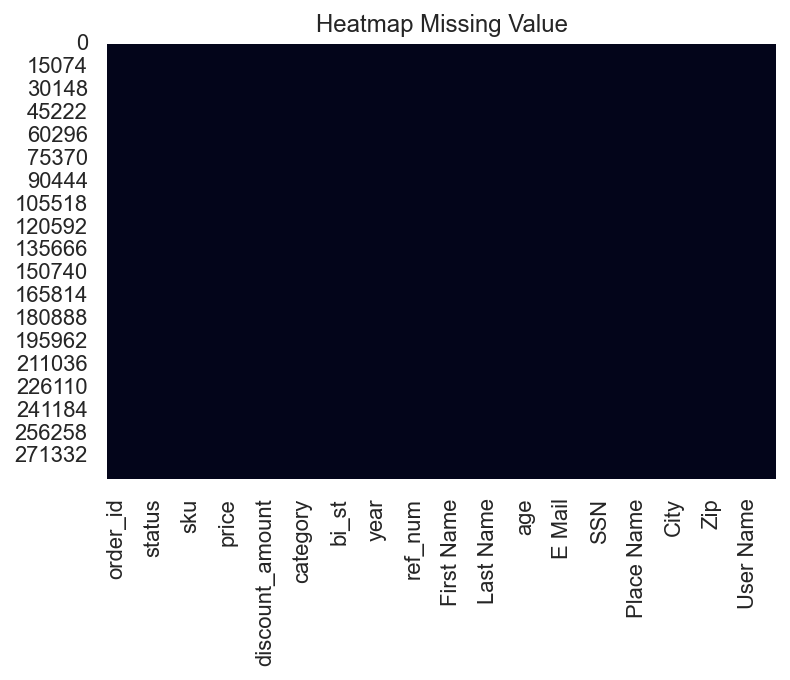

In [110]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

<a  id="duplicate">

## 4.2. Duplicate Values

</a>

**-Checking and dropping duplicates:**

In [111]:
print("The dataframe has " + str(df.duplicated().sum()) + " columns that have duplicates") 
#(print(df.drop_duplicates())

The dataframe has 0 columns that have duplicates


<a  id="errors">

## 4.3. Correcting Error

</a>

In [112]:
#Ada keanehan pada data terkait total yang tidak sesuai dari perkalian jumlah dengan harga. Perlu penyesuaian dengan mengurangi angka 1 pada kuantitas
df['qty_ordered'] = df['qty_ordered'] -1

<a  id="data_transformation">

## 4.4. Data Transformation

</a>

**-Changing columns names:**

In [113]:
df = df.rename(columns={'qty_ordered': 'quantity_ordered','total': 'total_sales','cust_id': 'customer_id'})

**-Type casting:**

In [114]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d')
df['bulan'] = pd.to_datetime(df['order_date']).dt.strftime('%Y-%m')
df['tahun'] = pd.to_datetime(df['order_date']).dt.strftime('%Y')
df['Customer Since'] = pd.to_datetime(df['Customer Since'], format='%m/%d/%Y')
df['quantity_ordered'] = df['quantity_ordered'].astype('int64')
df['age'] = df['age'].astype('int64')
#df[["year", "month"]] = df[["year", "month"]].apply(pd.to_datetime)

<hr>
<a class="anchor" id="analysis">
    
# 5. Data Analysis
    
</a>

<a  id="distribution">

## 5.1. Data Distribution

</a>

**-Selecting numerical variables:**

In [115]:
#numerical_variables = df.select_dtypes(exclude='O')
numerical_variables = df.select_dtypes(include=['number'])
categorical_variables = df.select_dtypes(include='O') #(Python) objects

In [116]:
numerical_variables.head()

item_id  quantity_ordered  price   value  discount_amount  total_sales  \
0  574772.0                20   89.9  1798.0              0.0       1798.0   
1  574774.0                10   19.0   190.0              0.0        190.0   
2  574777.0                 8  149.9  1199.2              0.0       1199.2   
3  574779.0                 8   79.9   639.2              0.0        639.2   
4  595185.0                 1   99.9    99.9              0.0         99.9   

   customer_id  year  ref_num  age    Zip  Discount_Percent  
0      60124.0  2020   987867   43  73571               0.0  
1      60124.0  2020   987867   43  73571               0.0  
2      60124.0  2020   987867   43  73571               0.0  
3      60124.0  2020   987867   43  73571               0.0  
4      60124.0  2020   987867   43  73571               0.0

In [117]:
numerical_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   item_id           286392 non-null  float64
 1   quantity_ordered  286392 non-null  int64  
 2   price             286392 non-null  float64
 3   value             286392 non-null  float64
 4   discount_amount   286392 non-null  float64
 5   total_sales       286392 non-null  float64
 6   customer_id       286392 non-null  float64
 7   year              286392 non-null  int64  
 8   ref_num           286392 non-null  int64  
 9   age               286392 non-null  int64  
 10  Zip               286392 non-null  int64  
 11  Discount_Percent  286392 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 26.2 MB


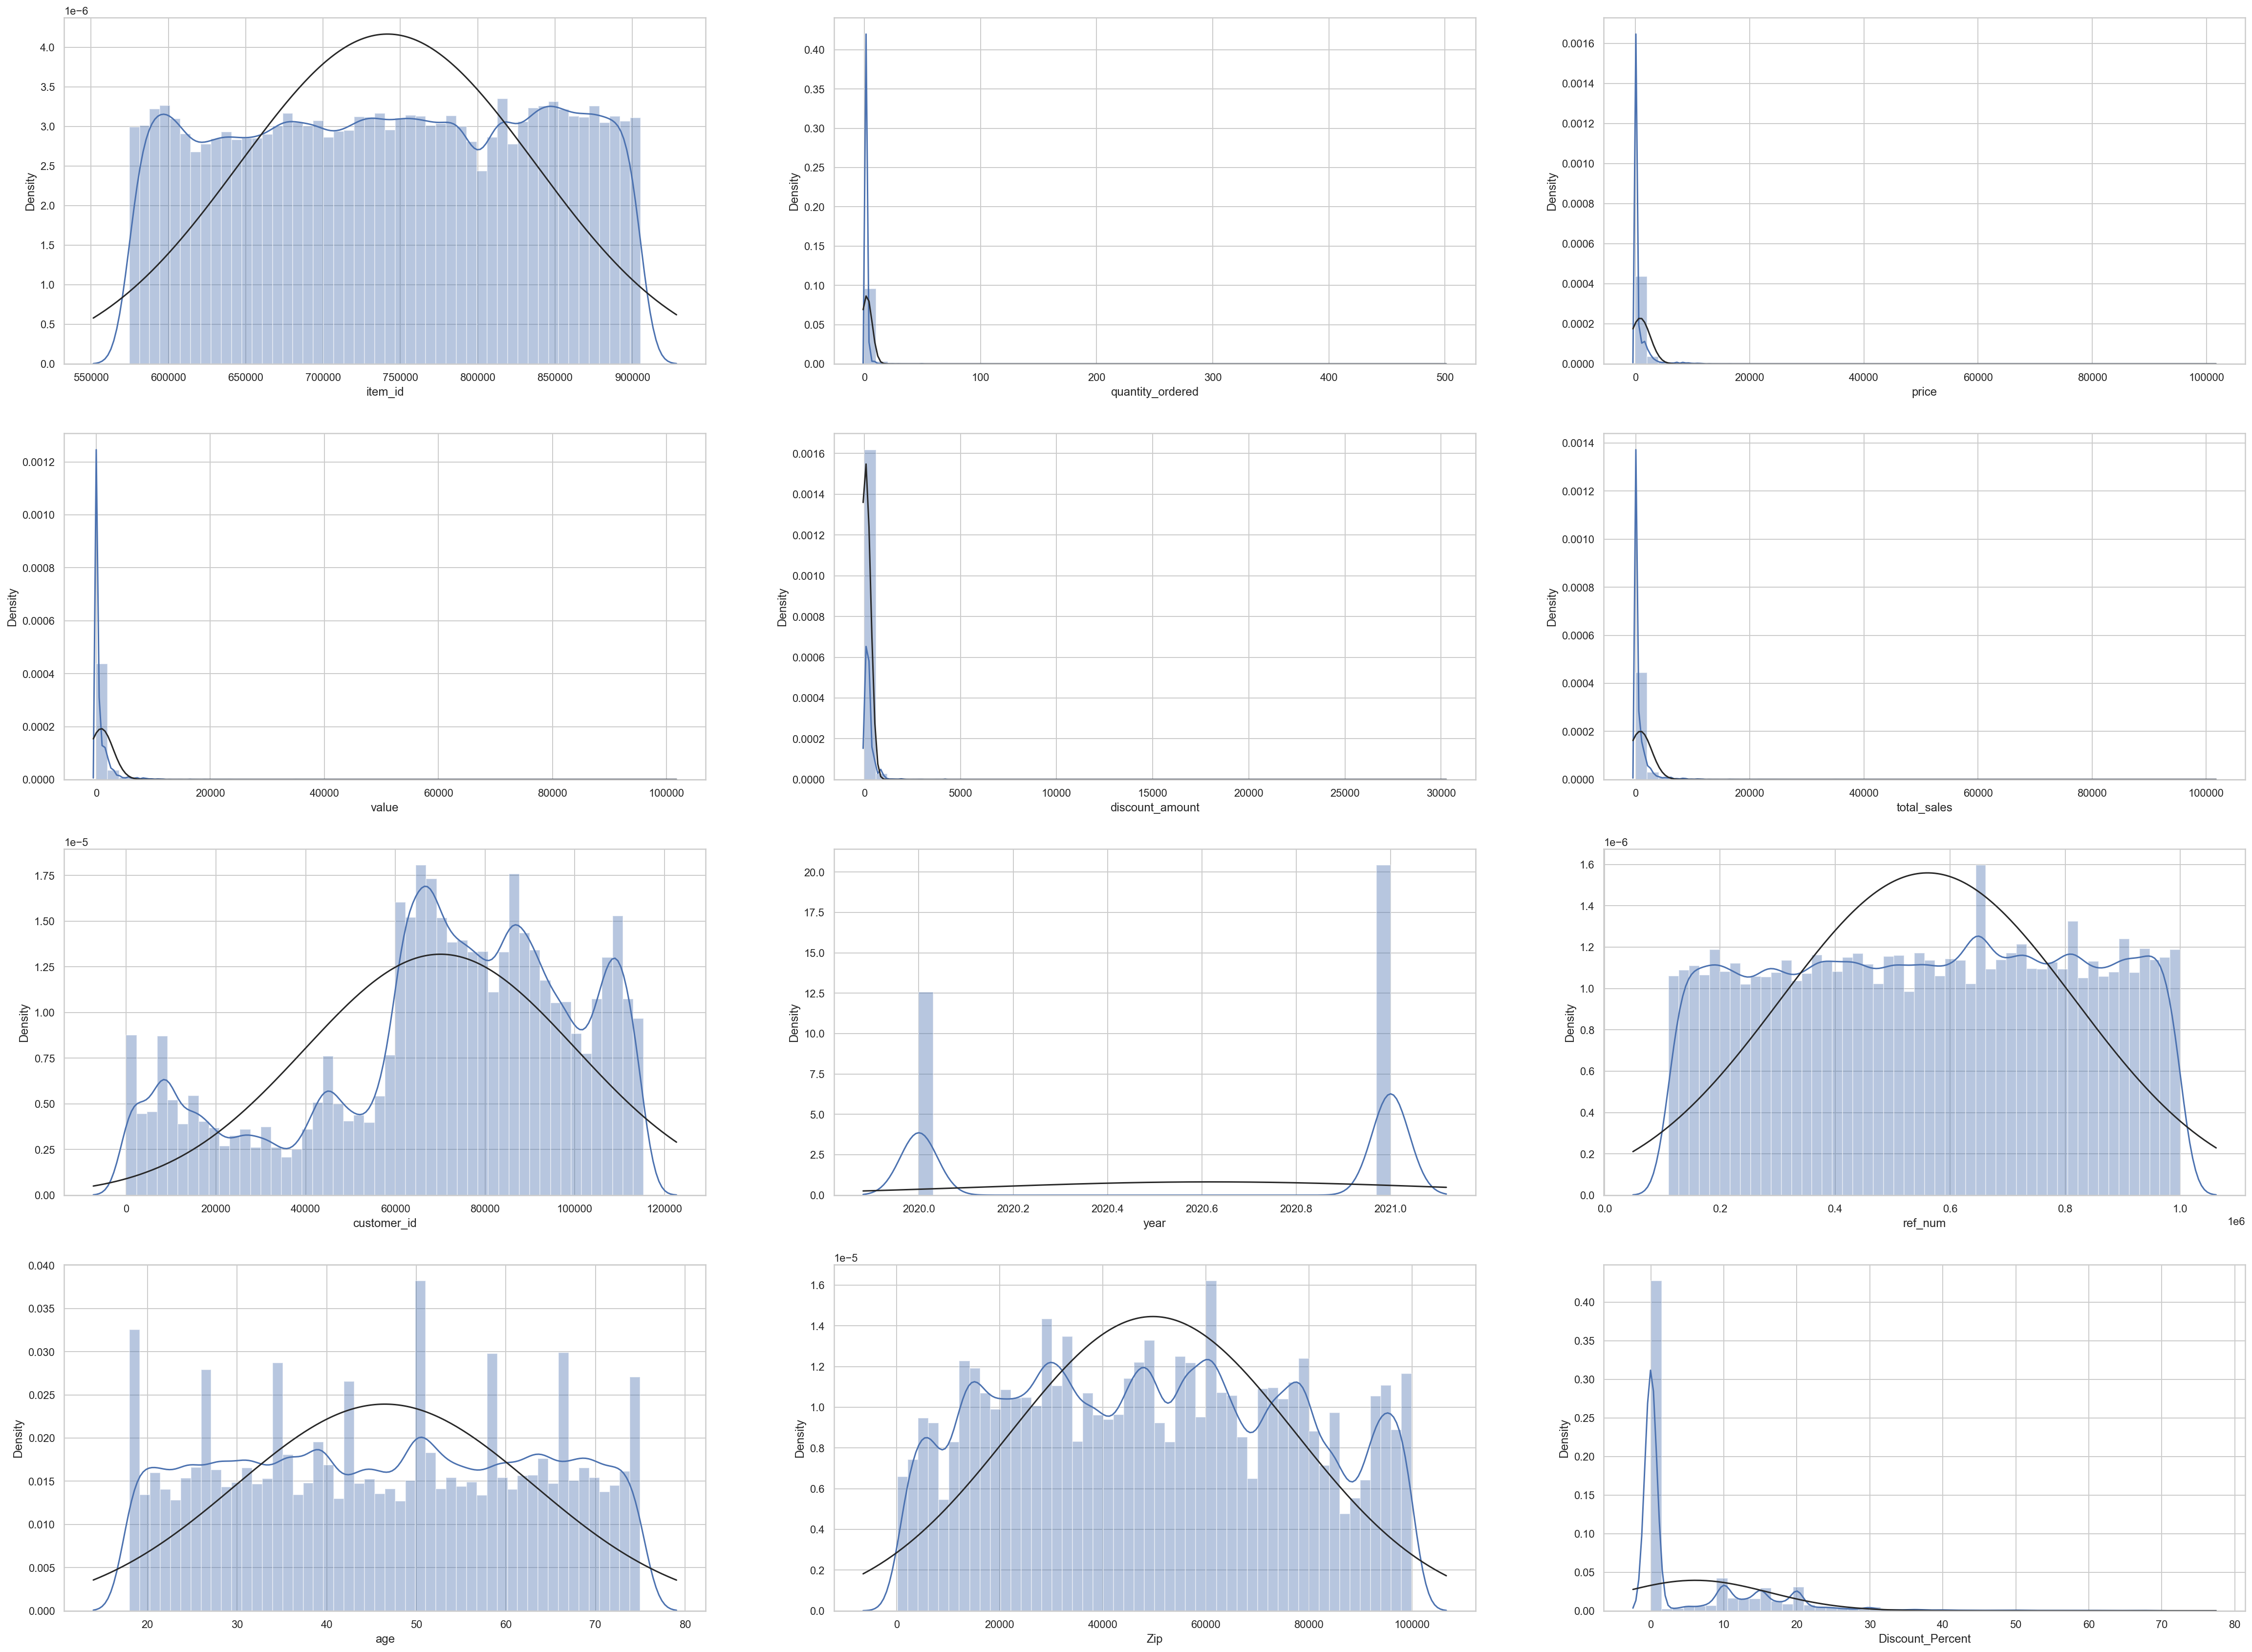

In [118]:
fig, ax = plt.subplots(4, 3, figsize=(40, 30))
for var, subplot in zip(numerical_variables, ax.flatten()):
    sns.distplot(df[var], ax=subplot, fit=norm)
#plt.savefig('distribution.png')

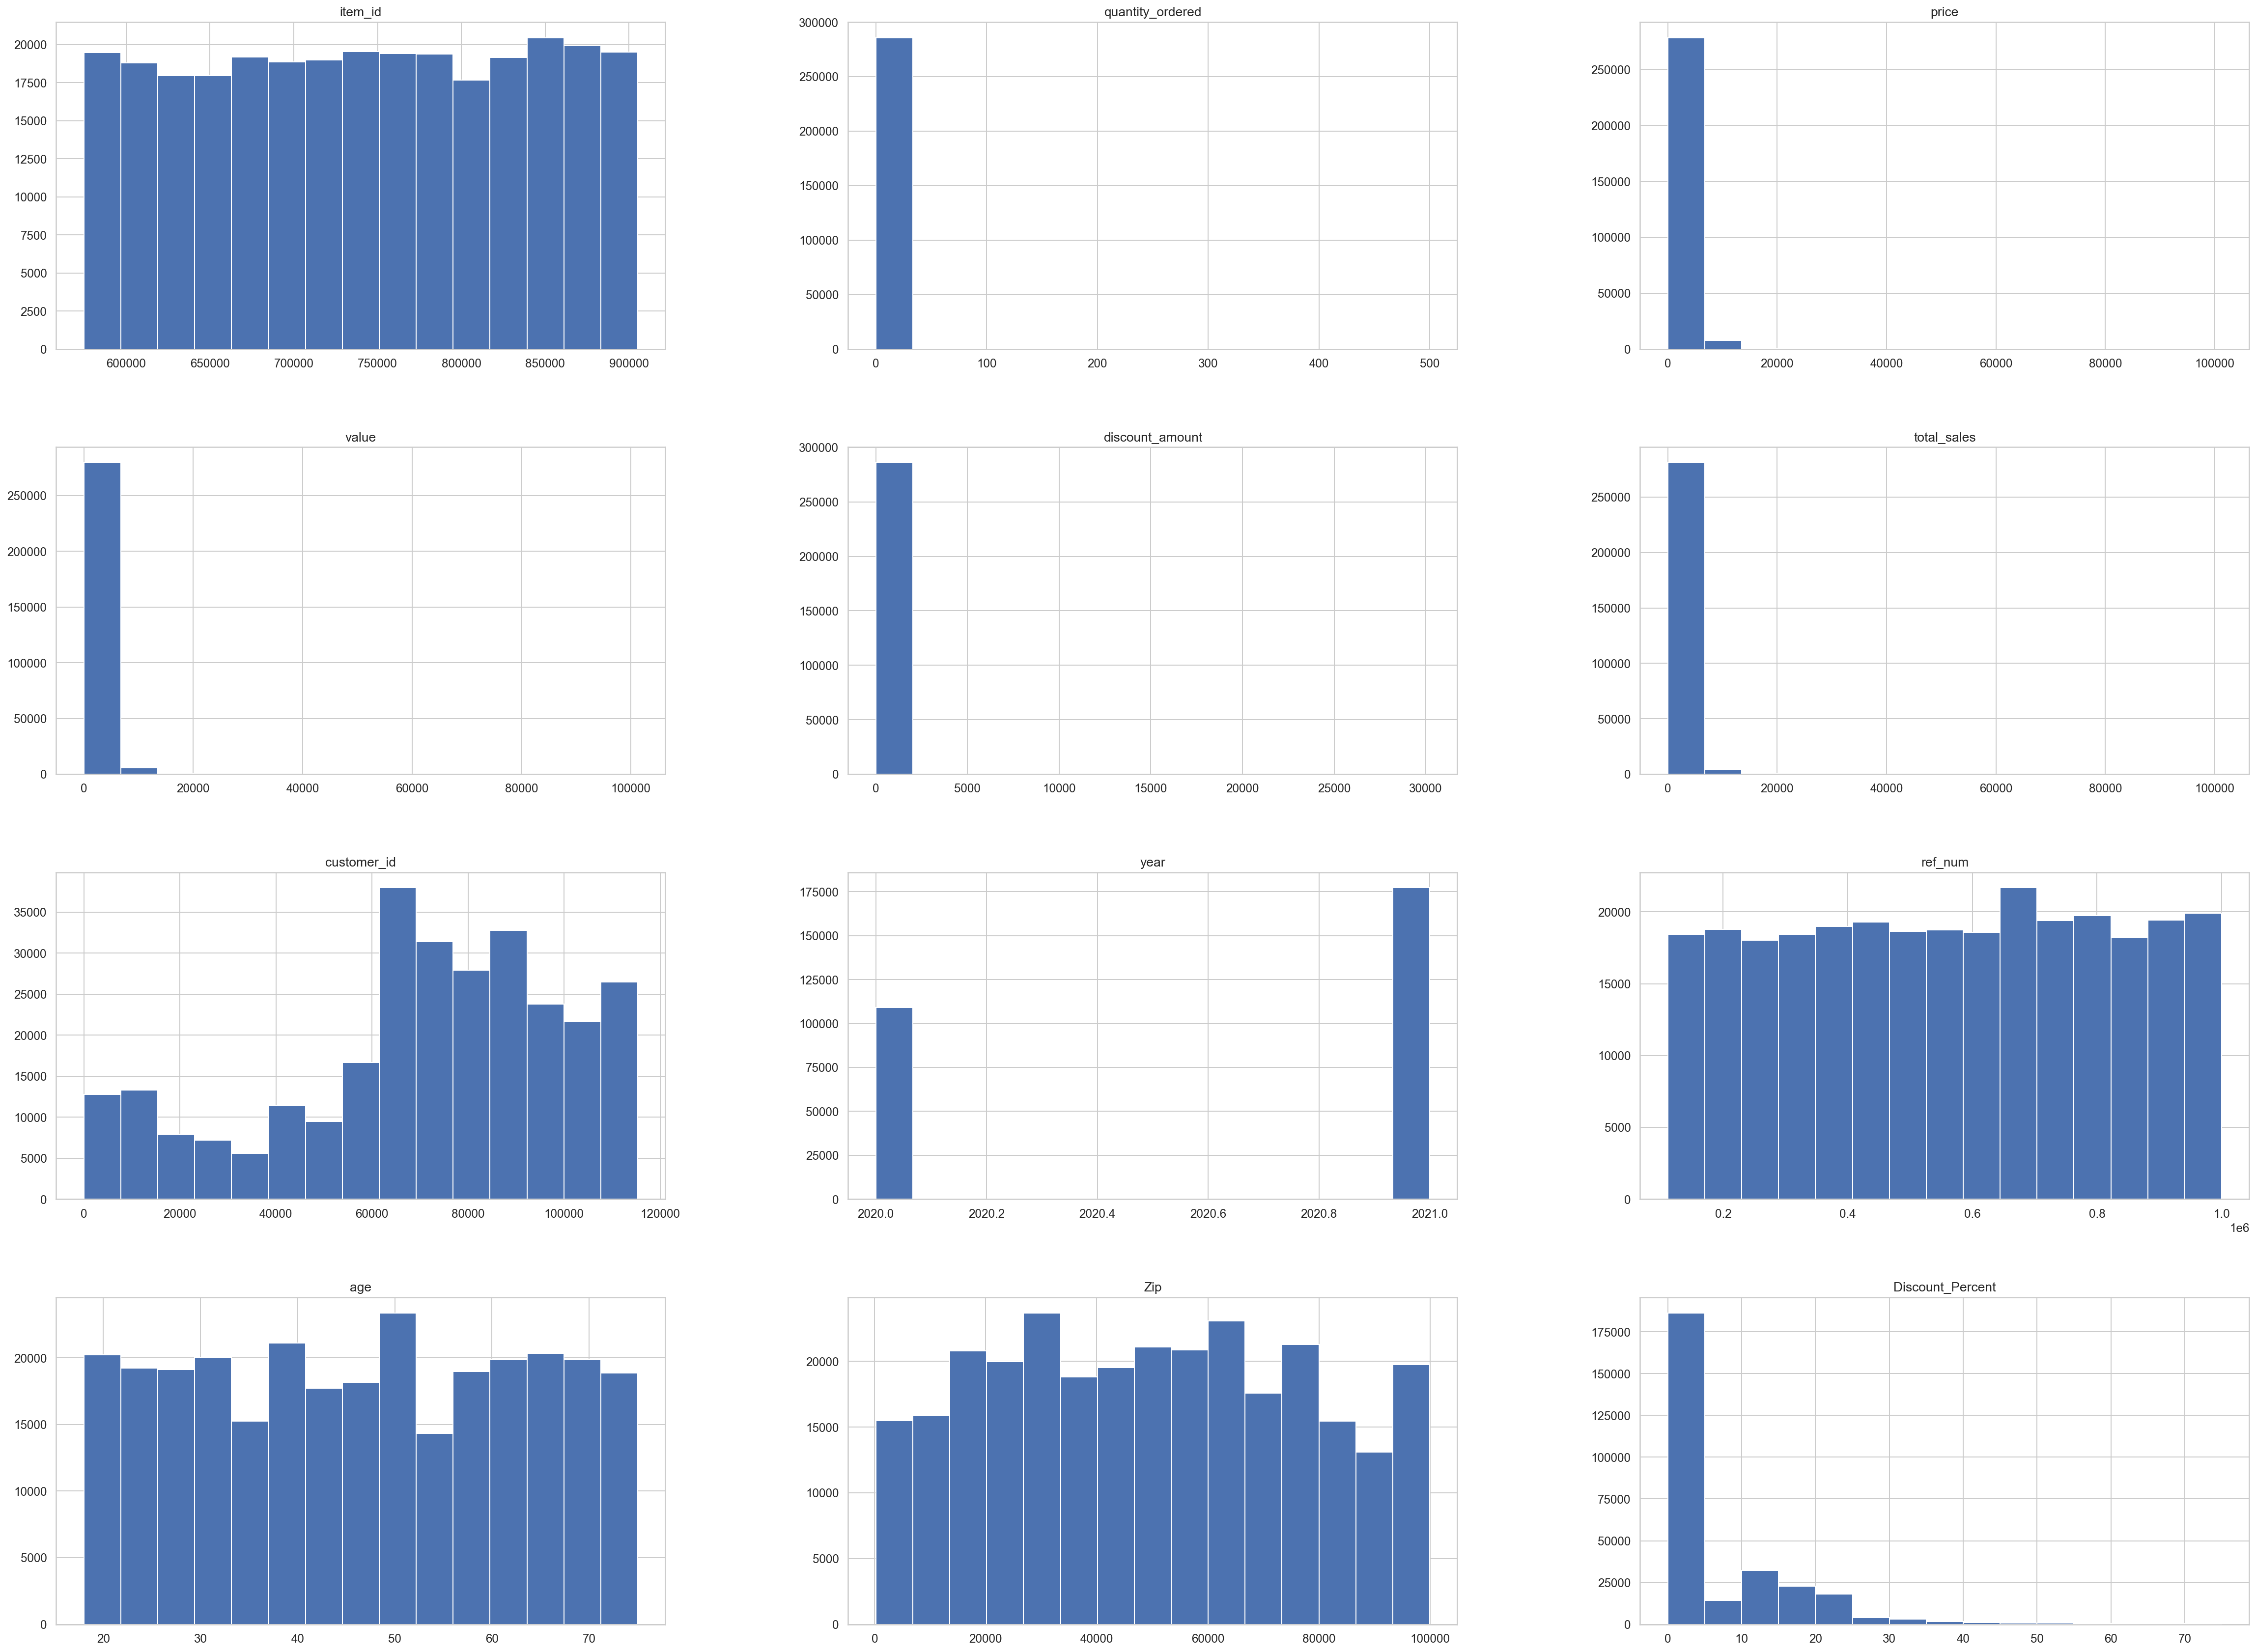

In [119]:
# Define the variables we want to see the distribution off
variables = numerical_variables

# Plot
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
variables.hist(bins=15, figsize=(40, 30), layout=(4, 3));
#plt.savefig('distribution2.png')

<a  id="outliers">

## 5.2. Outliers

</a>

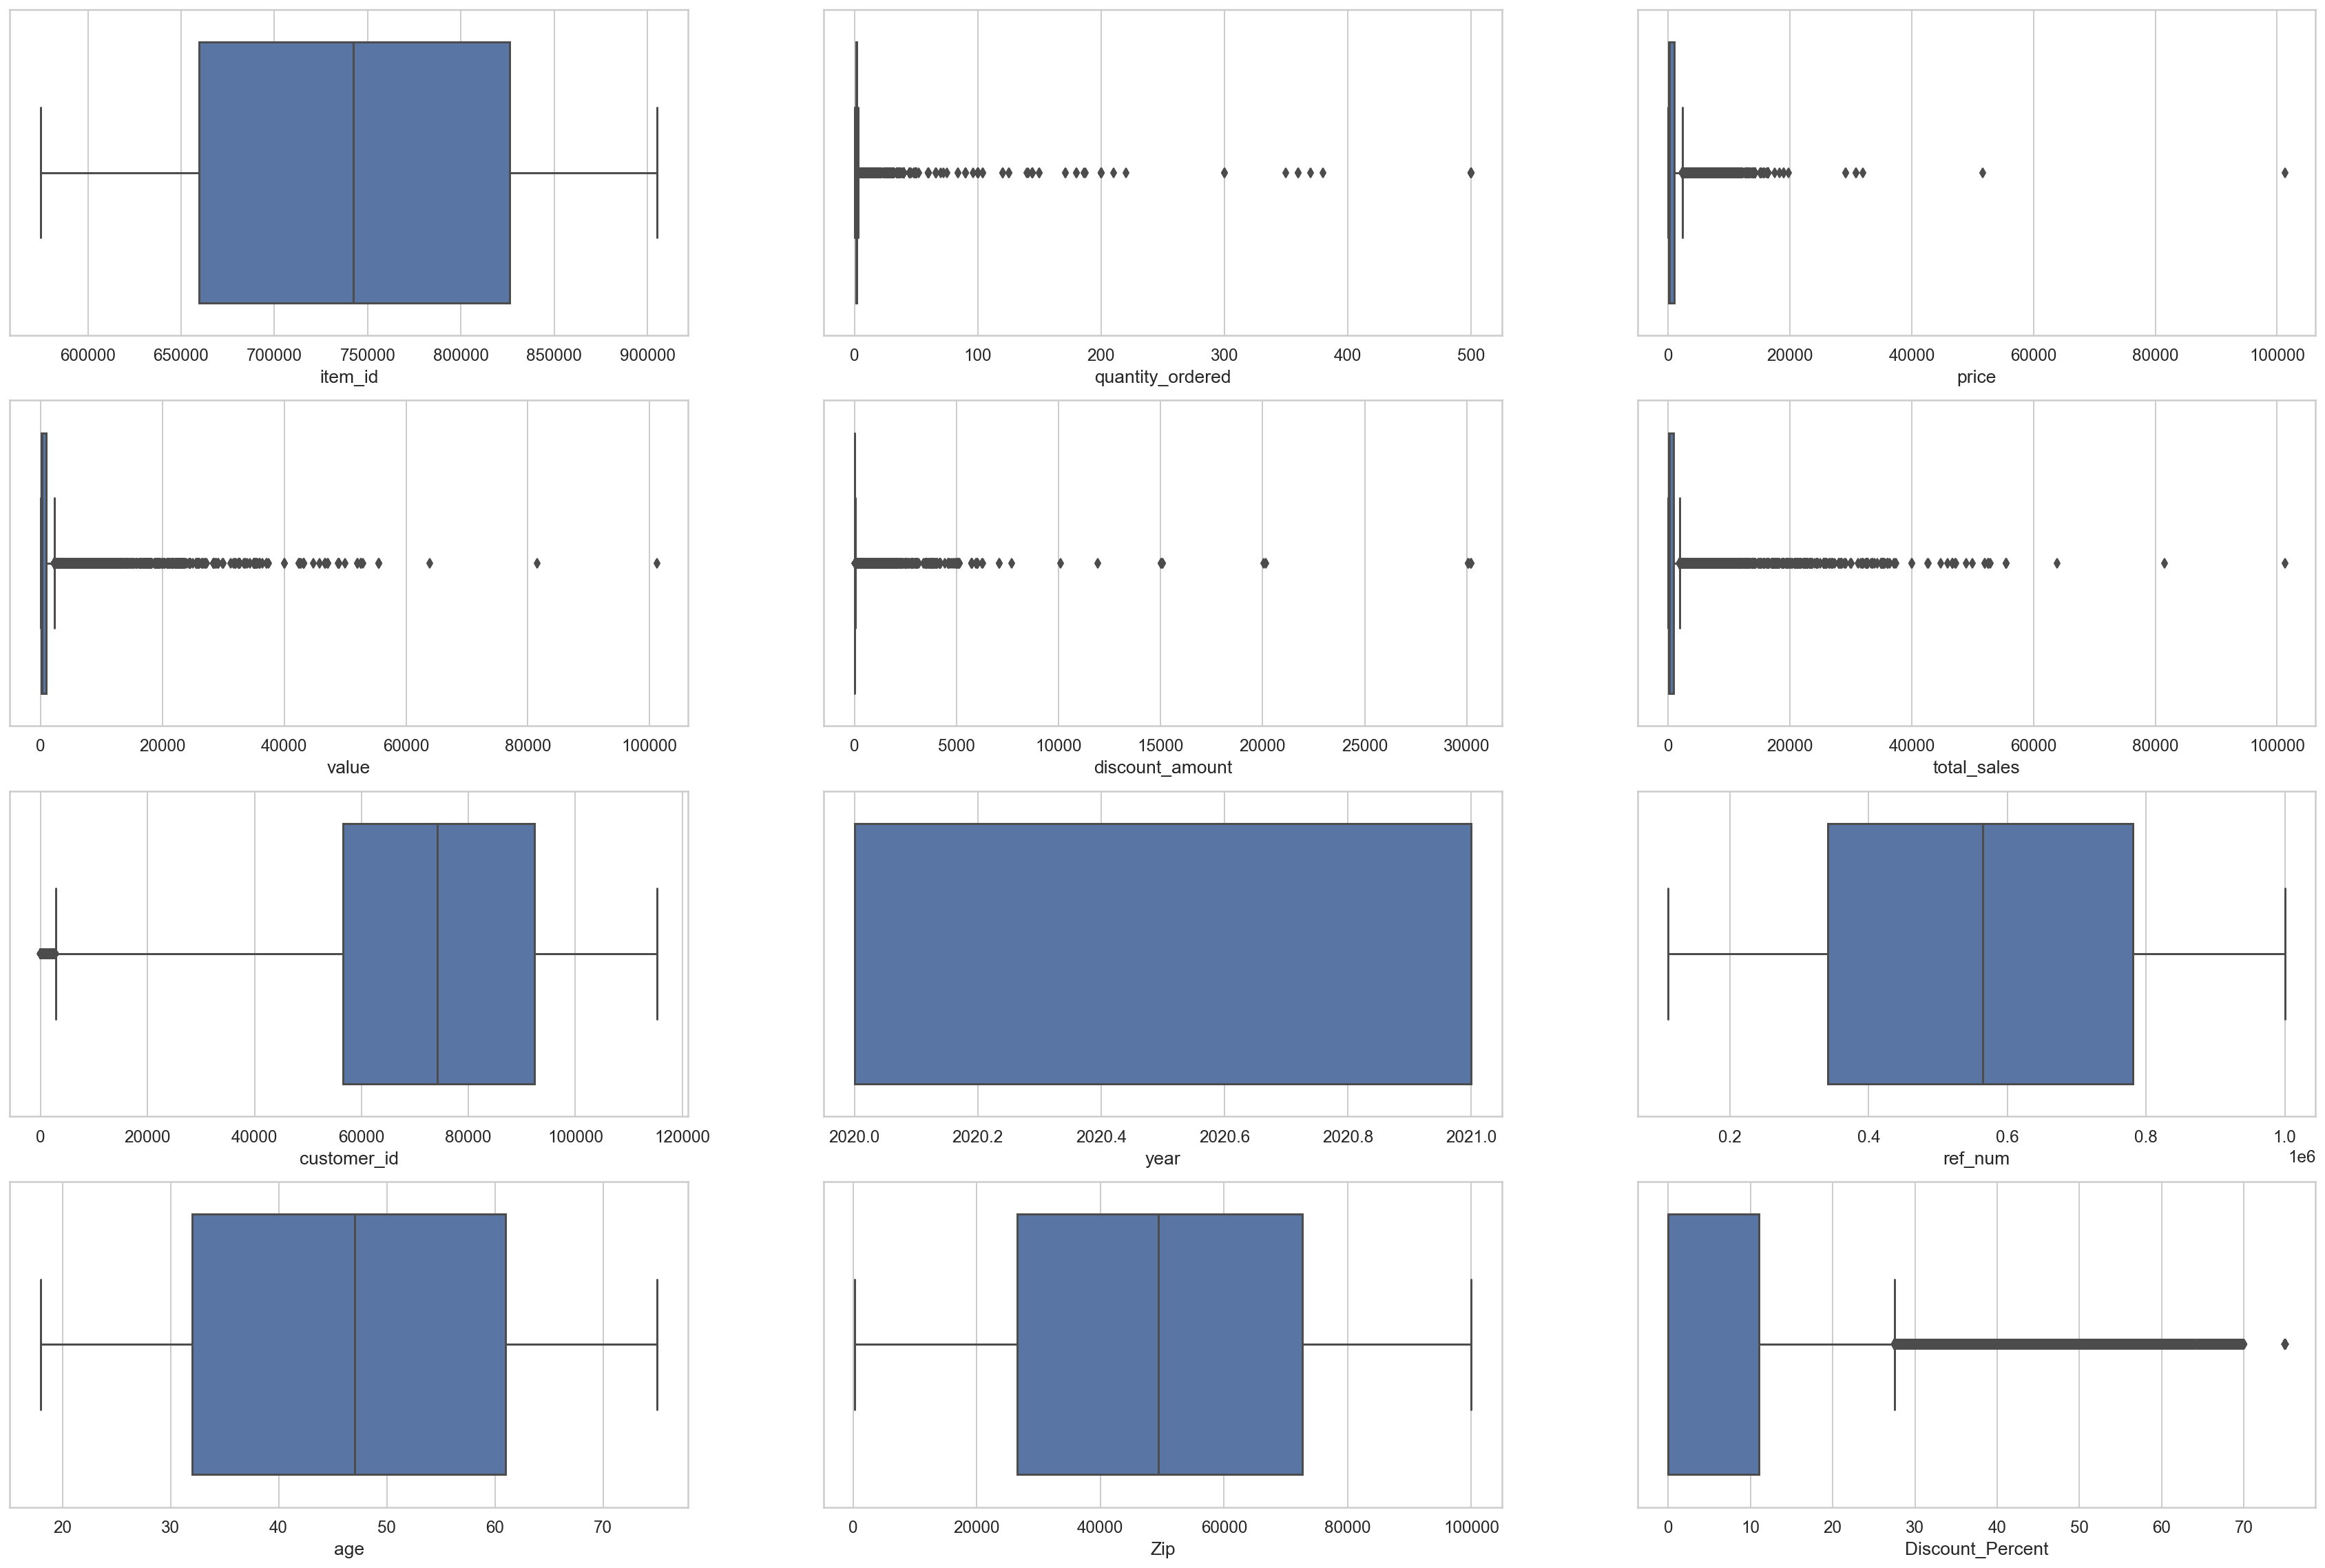

In [120]:
# Plot the boxplots for the columns previously defined 
fig, ax = plt.subplots(4, 3, figsize=(30,20))
for var, subplot in zip(numerical_variables, ax.flatten()):
    sns.boxplot(df[var], ax=subplot)
    
#plt.savefig('outliers.png')

We will not treat ouliers because they might give us more insights

<a  id="other">

## 5.3. Other Analysis

</a>

<a  id="churn">
    
### 5.3.1 Customer Churn Analytics
    
</a>    

**-Cohort Analysis:**

In [122]:
df.status.unique()

array(['received', 'complete', 'order_refunded', 'canceled', 'refund',
       'cod', 'paid', 'processing', 'closed', 'pending', 'pending_paypal',
       'payment_review', 'holded'], dtype=object)

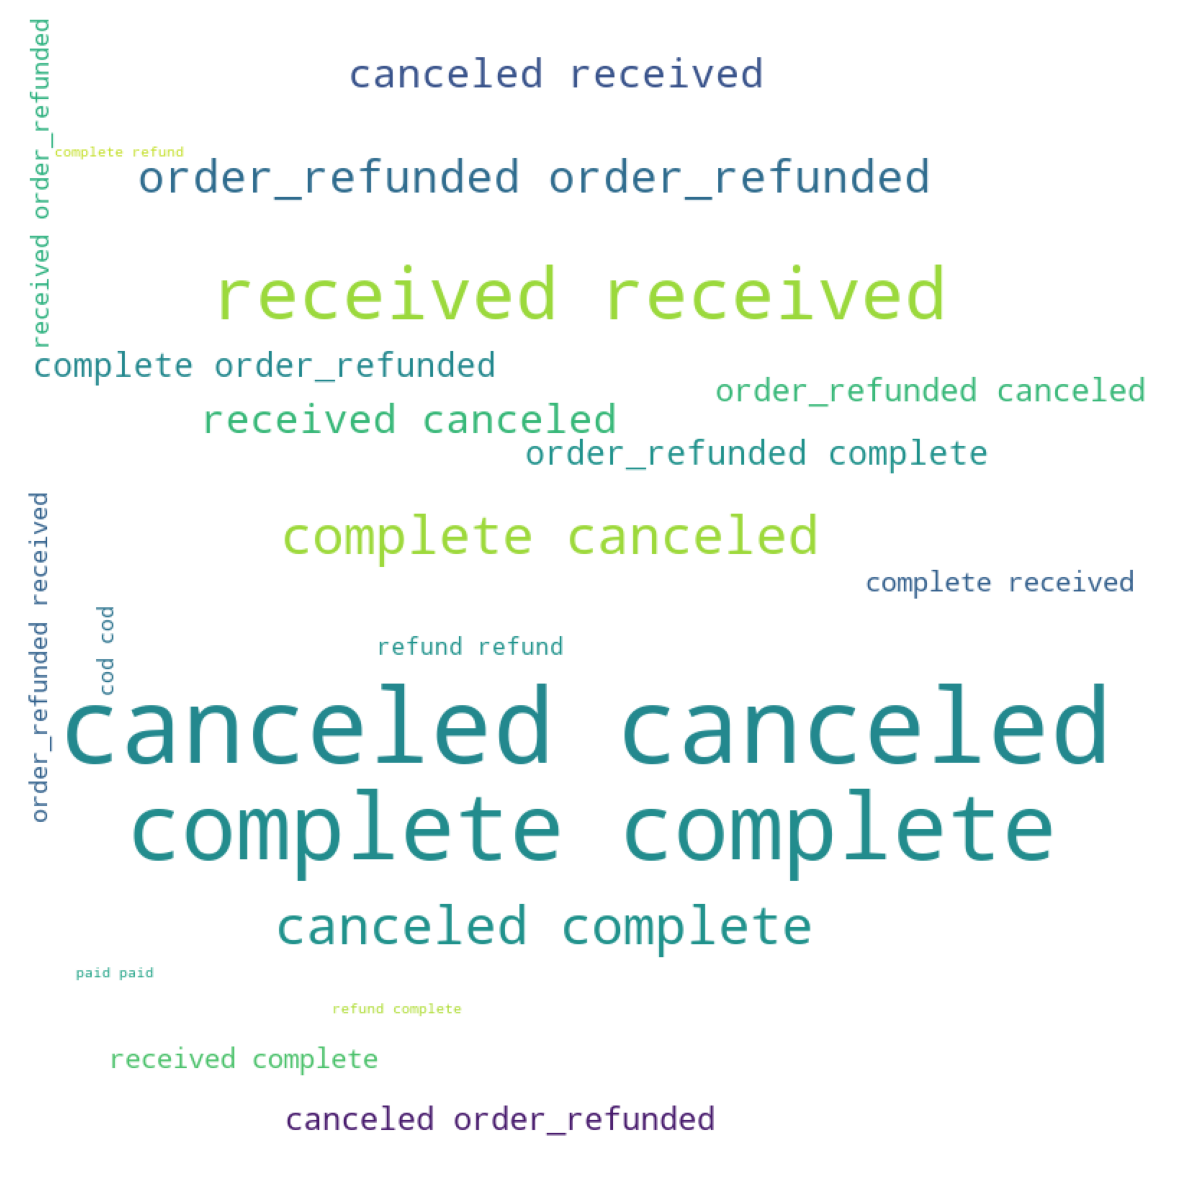

In [123]:
comment_words = ''
 
# iterate through the csv file
for val in df.status:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [124]:
df['churn_status'] = df['status']
df['churn_status'].replace({"received": 13, "complete": 12, "order_refunded": 1,
                            "canceled": 3, "refund": 2, "cod": 6, "paid": 11,
                            "processing": 7, "closed": 4, "pending": 8, "pending_paypal": 9,
                            "payment_review": 10, "holded": 5}, inplace=True)

In [125]:
# Hitung hari sejak pembelian pertama
df['days_since_first_purchase'] = (df['order_date'] - df['Customer Since']).dt.days

# Grup data berdasarkan days_since_first_purchase
churn_analysis = df.groupby('days_since_first_purchase').agg(
    avg_churn_status=('churn_status', 'mean'),
    statuses=('status', lambda x: ', '.join(x.unique()))
).reset_index()

In [126]:
churn_analysis

days_since_first_purchase  avg_churn_status            statuses
0                           1162             12.00            complete
1                           1164              1.00      order_refunded
2                           1165              3.00            canceled
3                           1166             12.00            complete
4                           1170              9.75  canceled, complete
...                          ...               ...                 ...
12792                      15459             13.00            received
12793                      15476              3.00            canceled
12794                      15490              8.00  canceled, received
12795                      15491              3.00            canceled
12796                      15538             13.00            received

[12797 rows x 3 columns]

In [127]:
#churn_analysis.to_excel('D:/Portofolio_Project/churn_analysis.xlsx')
#churn_analysis.to_csv('D:/Portofolio_Project/churn_analysis.csv', index=False)

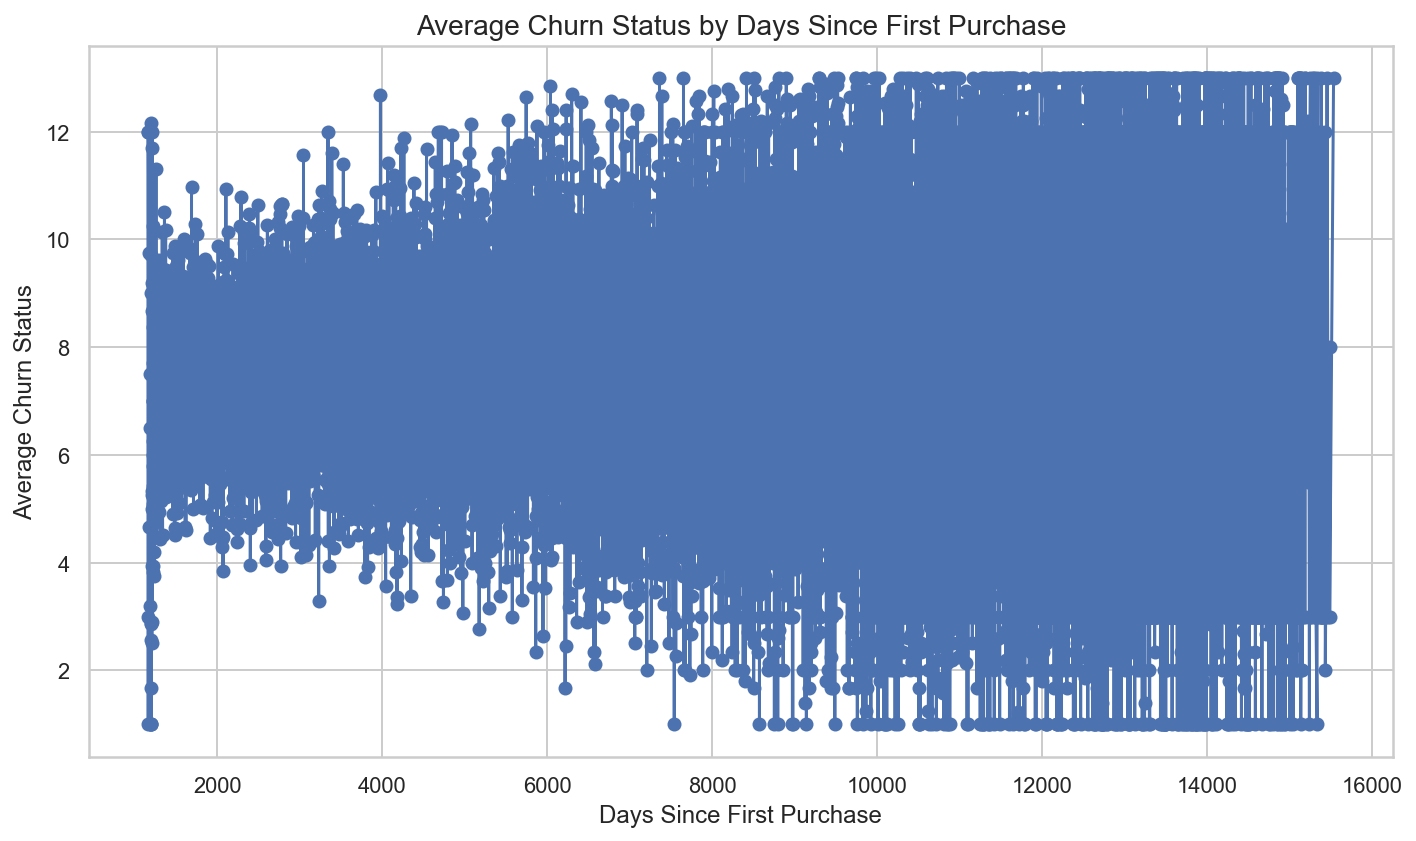

In [202]:
# Visualisasi
plt.figure(figsize=(10, 6))
plt.plot(churn_analysis['days_since_first_purchase'], churn_analysis['avg_churn_status'], marker='o')
plt.title('Average Churn Status by Days Since First Purchase', fontsize=14)
plt.xlabel('Days Since First Purchase', fontsize=12)
plt.ylabel('Average Churn Status', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Based on the analysis, the churn rate shows significant variability in the early stages of the customer lifecycle, particularly within the first 2000 days since their first purchase. This indicates that newer customers are more prone to churning, highlighting the importance of targeted retention strategies during this critical period. As customers progress in their lifecycle, the churn rate stabilizes, suggesting that long-term customers exhibit more consistent behavior. To reduce churn, efforts should focus on engaging new customers early while maintaining consistent service quality for long-term retention.

In [129]:
plt.savefig('D:/Portofolio_Project/GITHUB/assets/images/Churn_Rate_Based_on_Days_Since_First_Purchase.png',
            dpi=300, bbox_inches='tight')
# Menyimpan grafik ke folder tertentu
# Membuat folder output jika belum ada

<Figure size 576x360 with 0 Axes>

**Check distribution of the Order Status Variable:**

In [130]:
order_trends = pd.crosstab(df.bulan, df.status)
order_trends

status   canceled  closed   cod  complete  holded  order_refunded  paid  \
bulan                                                                     
2020-10      2499      31   221      2657       0            2144    34   
2020-11      7681      11   212      4772       0            2804    36   
2020-12     29606      24  1050     38183       0            5901   119   
2021-01      5366      14   129      7564       0            1885     7   
2021-02      2996       2     7      4510       0            1262     0   
2021-03      9582      10     3     11660       0            2243     0   
2021-04     20242      18   169     12440       0            2338    13   
2021-05      4981      17   100      5413       0            1732    32   
2021-06     11652      19   137      1637       0            1932    80   
2021-07      6799       5   157        29       0            1531   101   
2021-08      5476      21    16        82       0            1187    17   
2021-09      5286       4   650        21      25             754   317   

status   payment_review  pending  pending_paypal  processing  received  refund  
bulan                                                                           
2020-10               0        0               0           0      1618      83  
2020-11               0        0               4           0      1689     155  
2020-12               0        0               0           0      6213    1432  
2021-01               0        0               0           0      1903     344  
2021-02               0        1               0           0      1169     194  
2021-03               0       30               0           0      2860     464  
2021-04               0        0               0           0      6674     244  
2021-05               0        0               0           0      2249     291  
2021-06               0        1               0           1     11037     308  
2021-07               0        0               0           0      6570     148  
2021-08               0        1               0           0      4567      61  
2021-09              57       15               0          32      5226      96

In [131]:
#order_trends.to_excel('D:/Portofolio_Project/order_trends.xlsx')
#order_trends.to_csv('D:/Portofolio_Project/order_trends.csv', index=False)

Text(0.5, 1.0, 'Order Trends and Insights (2020-2021)')

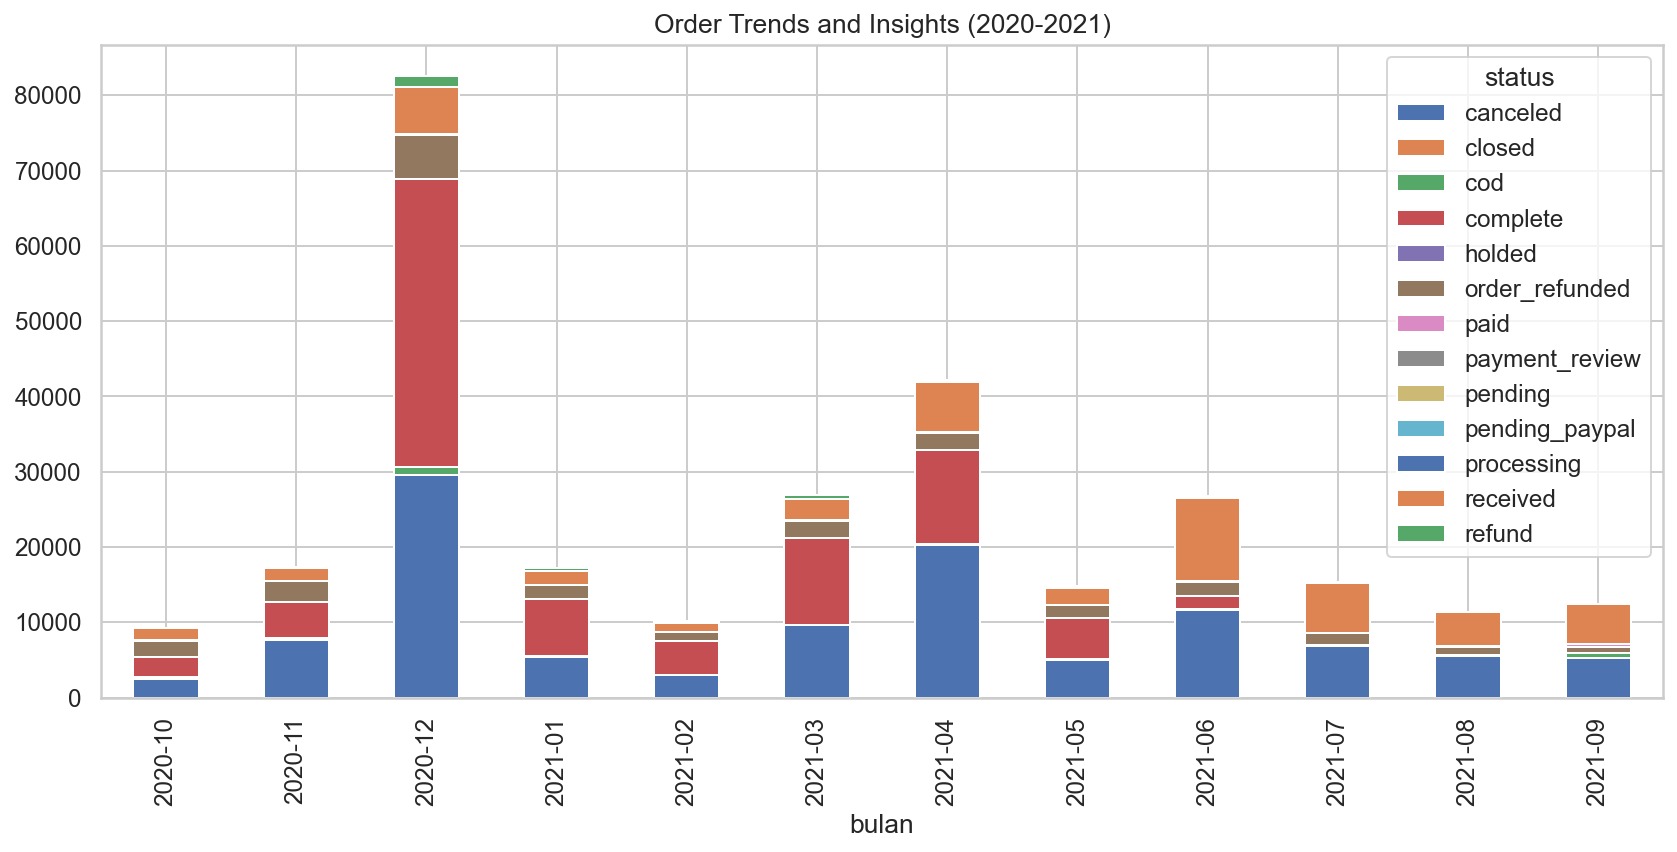

In [132]:
kt = pd.crosstab(index=df["bulan"], columns=df["status"])
p = kt.plot(kind="bar", figsize=(14,6), stacked=True)
plt.title('Order Trends and Insights (2020-2021)')
#plt.savefig('Order_status.png')

1. **Key Observations:**
   - There is a **significant spike in orders during December 2020**, most likely due to the holiday season and New Year's preparations. 
   - A notable **preference for COD (Cash on Delivery)** is observed, indicating consumer trust in receiving products before payment.
   - A large proportion of the orders in December were successfully completed, showcasing efficient supply chain and customer satisfaction.

2. **April 2021 Insight:**
   - Orders increased sharply in **April 2021**, indicating a potential seasonal or event-driven demand. 
   - Possible contributing factors include:
     - **Easter celebrations** (April 4, 2021), often associated with increased spending on food, beverages, and gifts.
     - **Tax refund season** in the United States, where many customers may receive refunds and allocate spending to consumer goods.
     - **Spring promotions or marketing campaigns** launched by the company or competitors.
     - A possible return to normalcy in consumer behavior as the pandemic situation improved in certain regions of the US.

3. **Recommendations:**
   - **Seasonal Strategy:** Plan promotions around the holiday season and key events.
   - **Payment Preferences:** Continue to support COD and consider highlighting this option in marketing campaigns.
   - **Market Research:** Investigate regional or industry-specific factors in April 2021 to better understand and capitalize on future opportunities.

---

Once we need to have just two different categories for the target value, we will consider as 'Default' order the categories equal to order_refunded, canceled, and refund and as 'Non Default' order the categories equal to the others.

In [133]:
default=['order_refunded', 'canceled', 'refund']
df['default_order']=df['status'].apply(lambda x: 'Default' if x in default else 'non_default')
df['default_order'].value_counts()

non_default    144693
Default        141699
Name: default_order, dtype: int64

#### Distribution of numerical variables per Default Status

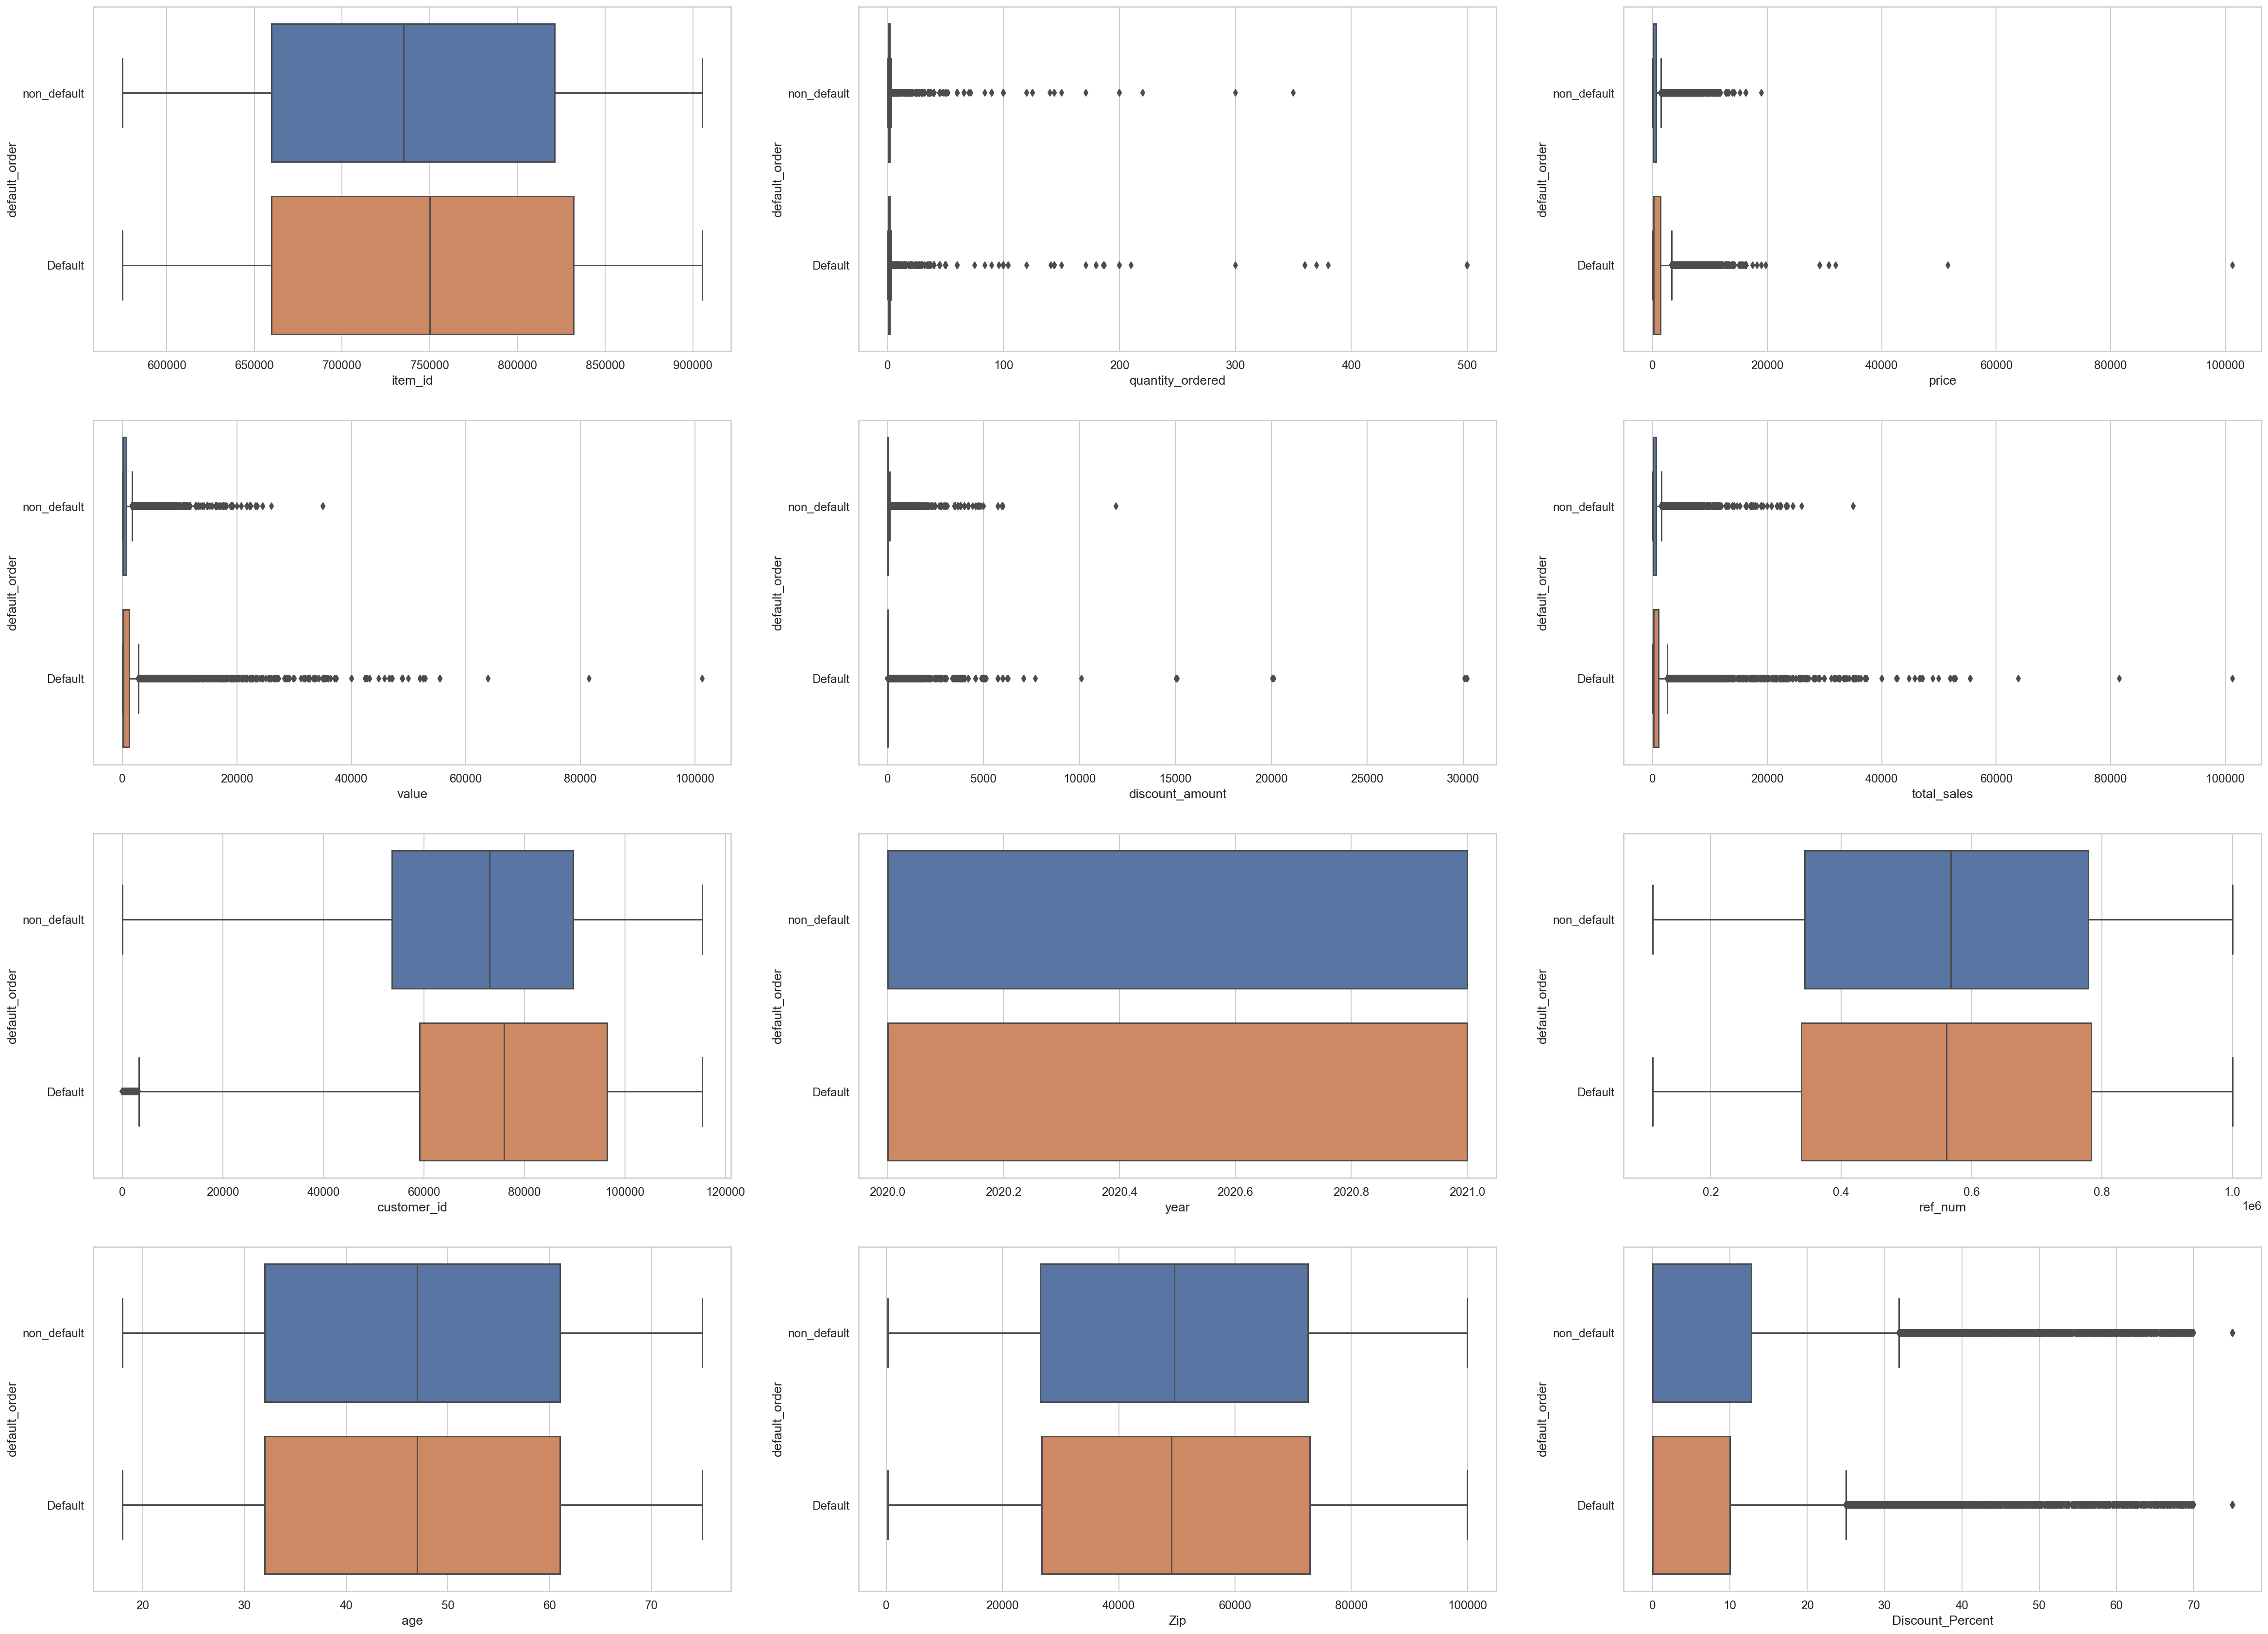

In [134]:
fig, ax = plt.subplots(4, 3, figsize=(40,30))
for var, subplot in zip(numerical_variables, ax.flatten()):
    sns.boxplot(x=df[var], y=df['default_order'], ax=subplot)
#plt.savefig('outliers2.png')

<a  id="fluctuation">
    
### 5.3.2. Demand Fluctuation Forecasting Analysis
    
</a>    

In [135]:
# Assuming df has columns: 'date', 'product_id', 'sales'
df_monthly_sales = df.groupby(df['order_date'].dt.to_period('M')).agg({'total_sales': 'sum'})

# Mengonversi index Period menjadi datetime untuk keperluan plotting
df_monthly_sales.index = df_monthly_sales.index.to_timestamp()

In [136]:
#df_monthly_sales.to_excel('D:/Portofolio_Project/df_monthly_sales.xlsx')
#df_monthly_sales.to_csv('D:/Portofolio_Project/df_monthly_sales.csv', index=False)

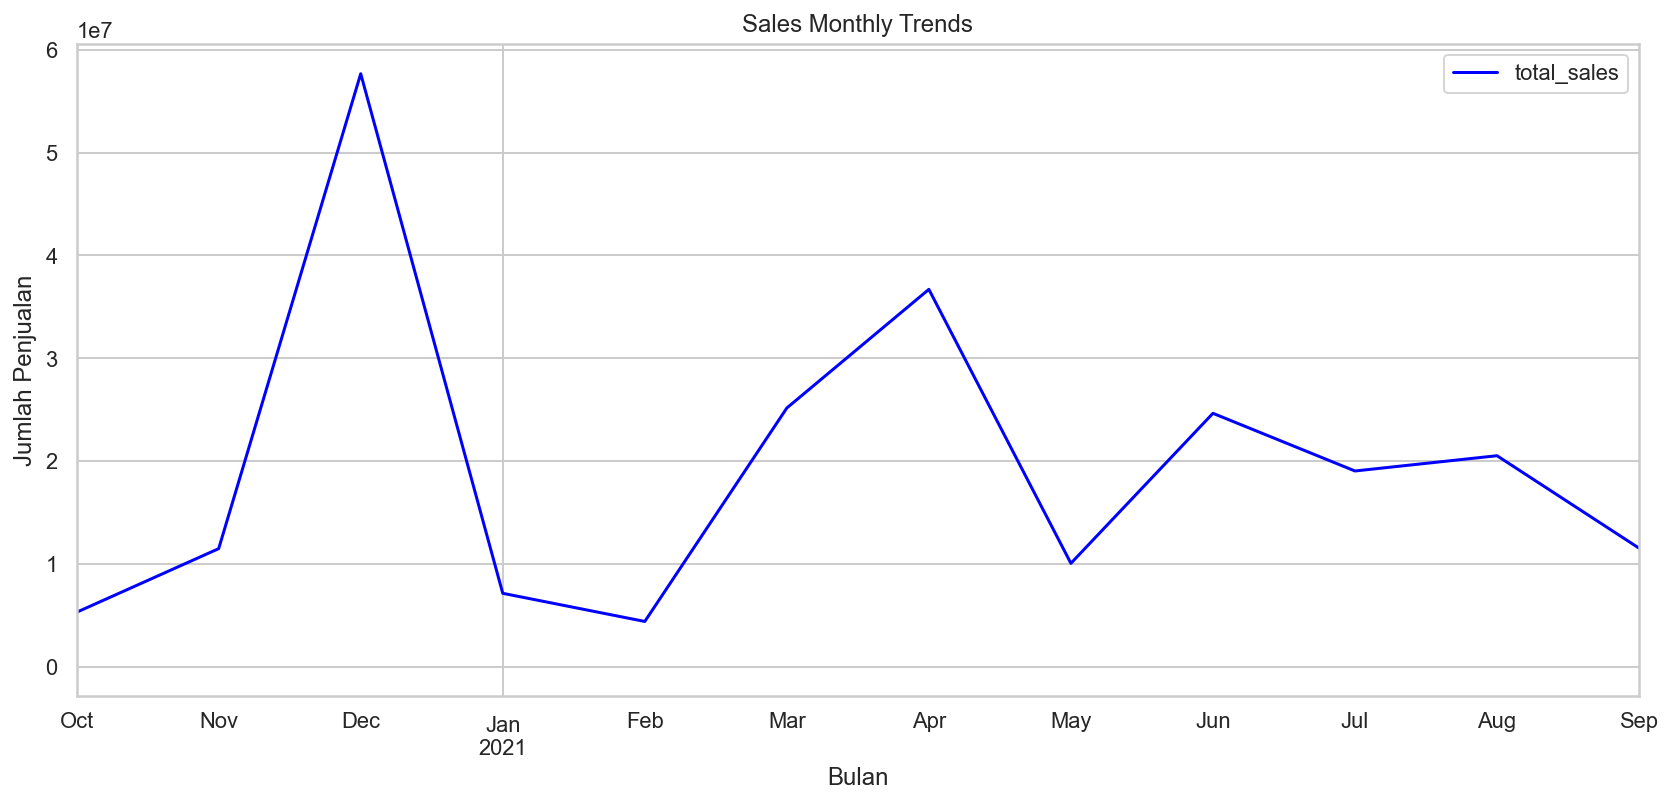

In [203]:
# Plotting sales trend over time
plt.figure(figsize=(14, 6))
df_monthly_sales['total_sales'].plot(kind='line', color='blue')
sns.lineplot(x='order_date', y='total_sales', data=df)
plt.title('Sales Monthly Trends')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.grid(True)
plt.show()

The monthly sales trend in the US shows a significant spike in December, indicating a surge in customer purchases during the holiday season. This highlights the importance of preparing for increased demand by ensuring adequate inventory and efficient logistics in the months leading up to year-end. Following the peak in December, sales drop sharply in January and February, before showing a gradual recovery in the following months. Businesses should focus on optimizing promotions and inventory for the holiday season while planning strategies to sustain sales during the quieter months.

---

For FMCG (Fast-Moving Consumer Goods) companies, here are real steps that can be taken based on sales trend graphs:

### **1. Preparation for the End of the Year**
- **Increase Product Stock**:
- Identify products that have high demand during the holiday season (December) and increase their stock.
- Make sure the supply chain is ready to face the surge in demand.

- **End of Year Promotion Strategy**:
- Launch attractive promotional campaigns, such as holiday discounts, product bundling, or exclusive offers.
- Focus on online platforms to reach more consumers during big shopping periods.

- **Efficient Distribution**:
- Ensure distribution to warehouses and retailers is carried out on time to avoid stock shortages.
- Optimize logistics by prioritizing areas with high sales.

---

### **2. Strategy to Overcome Decline at the Beginning of the Year**
- **New Year Promotion**:
- Run promotions such as "New Year Deals" to attract consumers in January and February.
- Provide incentives to customers, such as cashback or loyalty points, to encourage purchases after the holiday season.

- **Product Diversification**:
- Offer new products or product variations that are in line with consumer resolutions at the beginning of the year, such as health products or those that support a healthy lifestyle.

- **Optimize Distribution Channels**:
- Focus on more efficient sales channels, such as e-commerce, to reduce operating costs when demand decreases.

---

### **3. Long-Term Plan**
- **Sales Data Analysis**:
- Use previous sales data to predict demand trends in the following year.
- Segment the market to understand consumer spending patterns.

- **Better Inventory Management**:
- Use a data-driven inventory management system to ensure product availability throughout the year.
- Avoid overstocking after peak sales to reduce the risk of unsold items.

- **Invest in Branding**:
- Increase marketing campaigns to build customer loyalty throughout the year, so that it does not only depend on the holiday season.

With these steps, FMCG companies can maximize profits during peak seasons and maintain stable sales in other months.

---

**Using model prediction to predicted demand in future:**

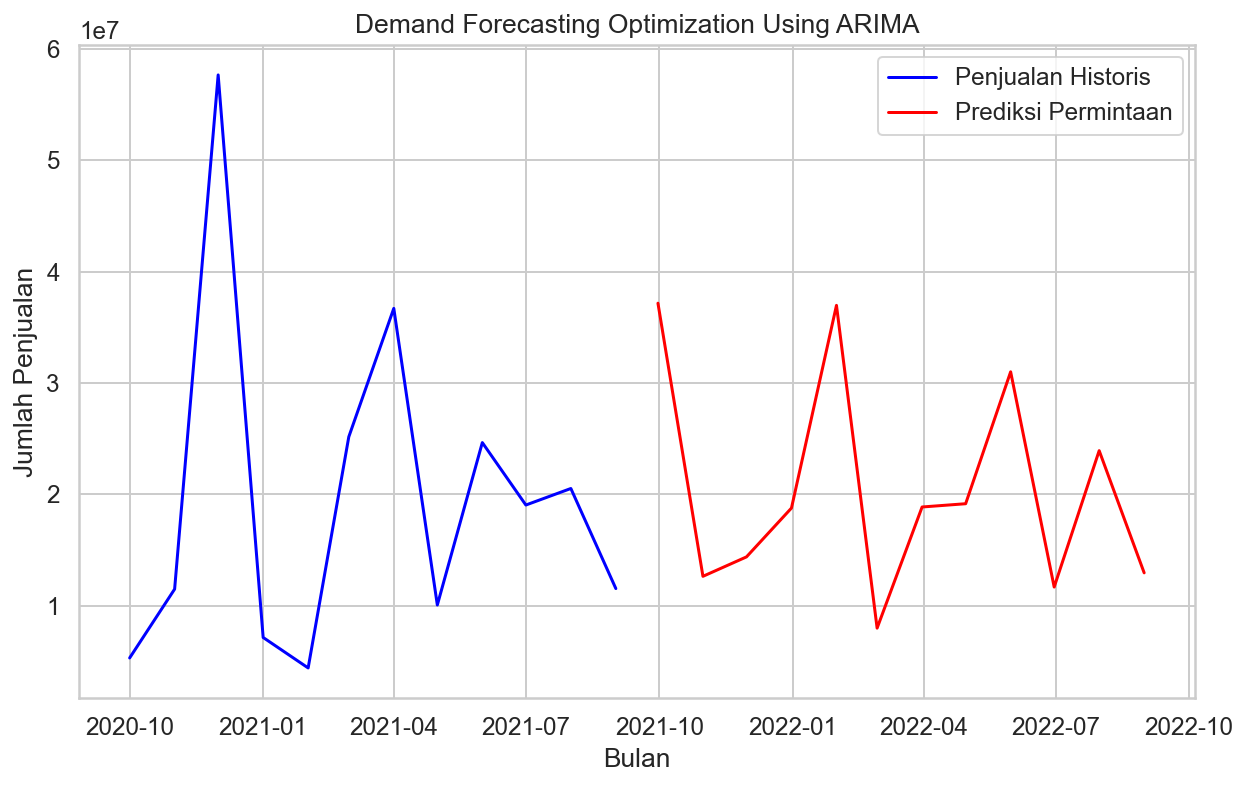

In [138]:
# Model ARIMA untuk prediksi permintaan
model = ARIMA(df_monthly_sales['total_sales'], order=(5, 1, 0))  # Example ARIMA order
model_fit = model.fit()

# Forecasting future demand
forecast_steps = 12  # Forecasting for 12 months ahead
forecast = model_fit.forecast(steps=forecast_steps)

# Plotting historical sales and forecasted demand
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_sales.index, df_monthly_sales['total_sales'], label='Penjualan Historis', color='blue')
plt.plot(pd.date_range(df_monthly_sales.index[-1], periods=forecast_steps, freq='M'), forecast, label='Prediksi Permintaan', color='red')
plt.title('Demand Forecasting Optimization Using ARIMA')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.legend()
plt.grid(True)
plt.show()

From the forecasting results using the ARIMA model, we can see sales predictions for the next 12 months. We project an increase in sales in certain months, which indicates a potential increase in revenue. We can use this data to optimize inventory and set a more focused marketing strategy.

By using this sales prediction, we can:
- Improve stock management to meet predicted demand.
- Target promotions and discounts in months with high sales projections.
- Reduce the risk of excess stock in months with declining sales.
- Optimize distribution and production capacity to maximize revenue.

---

<a  id="segmentation">
    
### 5.3.3. Customer Segmentation Analysis for Personalized Marketing
    
</a>    

In [139]:
# 1. Mengonversi kolom Gender menjadi format numerik
label_encoder = LabelEncoder()

cols_to_encode = ['Gender']
df[cols_to_encode] = df[cols_to_encode].apply(label_encoder.fit_transform)

In [140]:
df_segmen = df[['age', 'Gender', 'quantity_ordered']]

In [141]:
#df_segmen.to_excel('D:/Portofolio_Project/df_segmen.xlsx')
#df_segmen.to_csv('D:/Portofolio_Project/df_segmen.csv', index=False)

In [142]:
# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segmen)

# Apply KMeans clustering to segment customers
kmeans = KMeans(n_clusters=3, random_state=0)
df['Segment'] = kmeans.fit_predict(df_scaled)

In [143]:
# Mengembalikan ke kategori asli
df['Gender'] = label_encoder.inverse_transform(df['Gender'])
#df['Region'] = city_encoder.inverse_transform(df['Region'])
#df['status'] = product_encoder.inverse_transform(df['status'])
#df['category'] = product_encoder.inverse_transform(df['category'])

In [144]:
df['Gender'] # 'Female' -> 0, 'Male' -> 1

0         F
1         F
2         F
3         F
4         F
         ..
286387    M
286388    M
286389    F
286390    F
286391    M
Name: Gender, Length: 286392, dtype: object

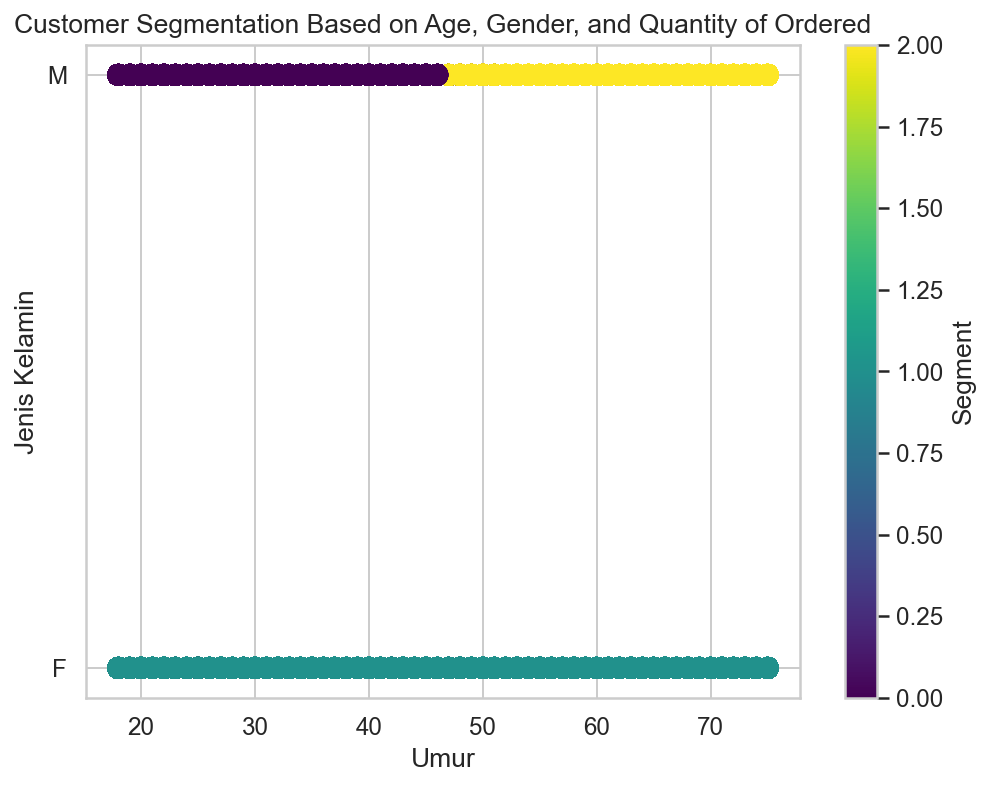

In [145]:
# Plot customer segmentation
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['age'], df['Gender'], c=df['Segment'], cmap='viridis', s=100)

# Menambahkan keterangan warna (colorbar)
cbar = plt.colorbar(scatter)
cbar.set_label('Segment')  # Memberikan label pada colorbar

# Menambahkan label segmen pada plot
#for i in range(df.shape[0]):
    #plt.text(df['age'][i], df['Gender'][i], str(df['Segment'][i]), fontsize=12, alpha=0.7)
    
plt.title('Customer Segmentation Based on Age, Gender, and Quantity of Ordered')
plt.xlabel('Umur')
plt.ylabel('Jenis Kelamin')
plt.grid(True)
plt.show()

The chart illustrates customer segmentation based on **age**, **gender**, and their assigned segments. Male customers predominantly belong to **Segment 2** (yellow), particularly in older age groups, indicating that this segment might represent a distinct category of customers, possibly those with higher purchasing power or specific buying behaviors. Female customers, on the other hand, are concentrated in **Segment 0** (teal), showing more uniformity across all age ranges. This segmentation suggests that personalized marketing strategies could be tailored for each group, such as targeting male customers in Segment 2 with premium products, while focusing on broader offerings for females in Segment 0 to maximize engagement.

#### Distribution of products across customer segments 

In [146]:
product_data = df[['Segment', 'category', 'quantity_ordered']]

In [147]:
#product_data.to_excel('D:/Portofolio_Project/product_data.xlsx')
#product_data.to_csv('D:/Portofolio_Project/product_data.csv', index=False)

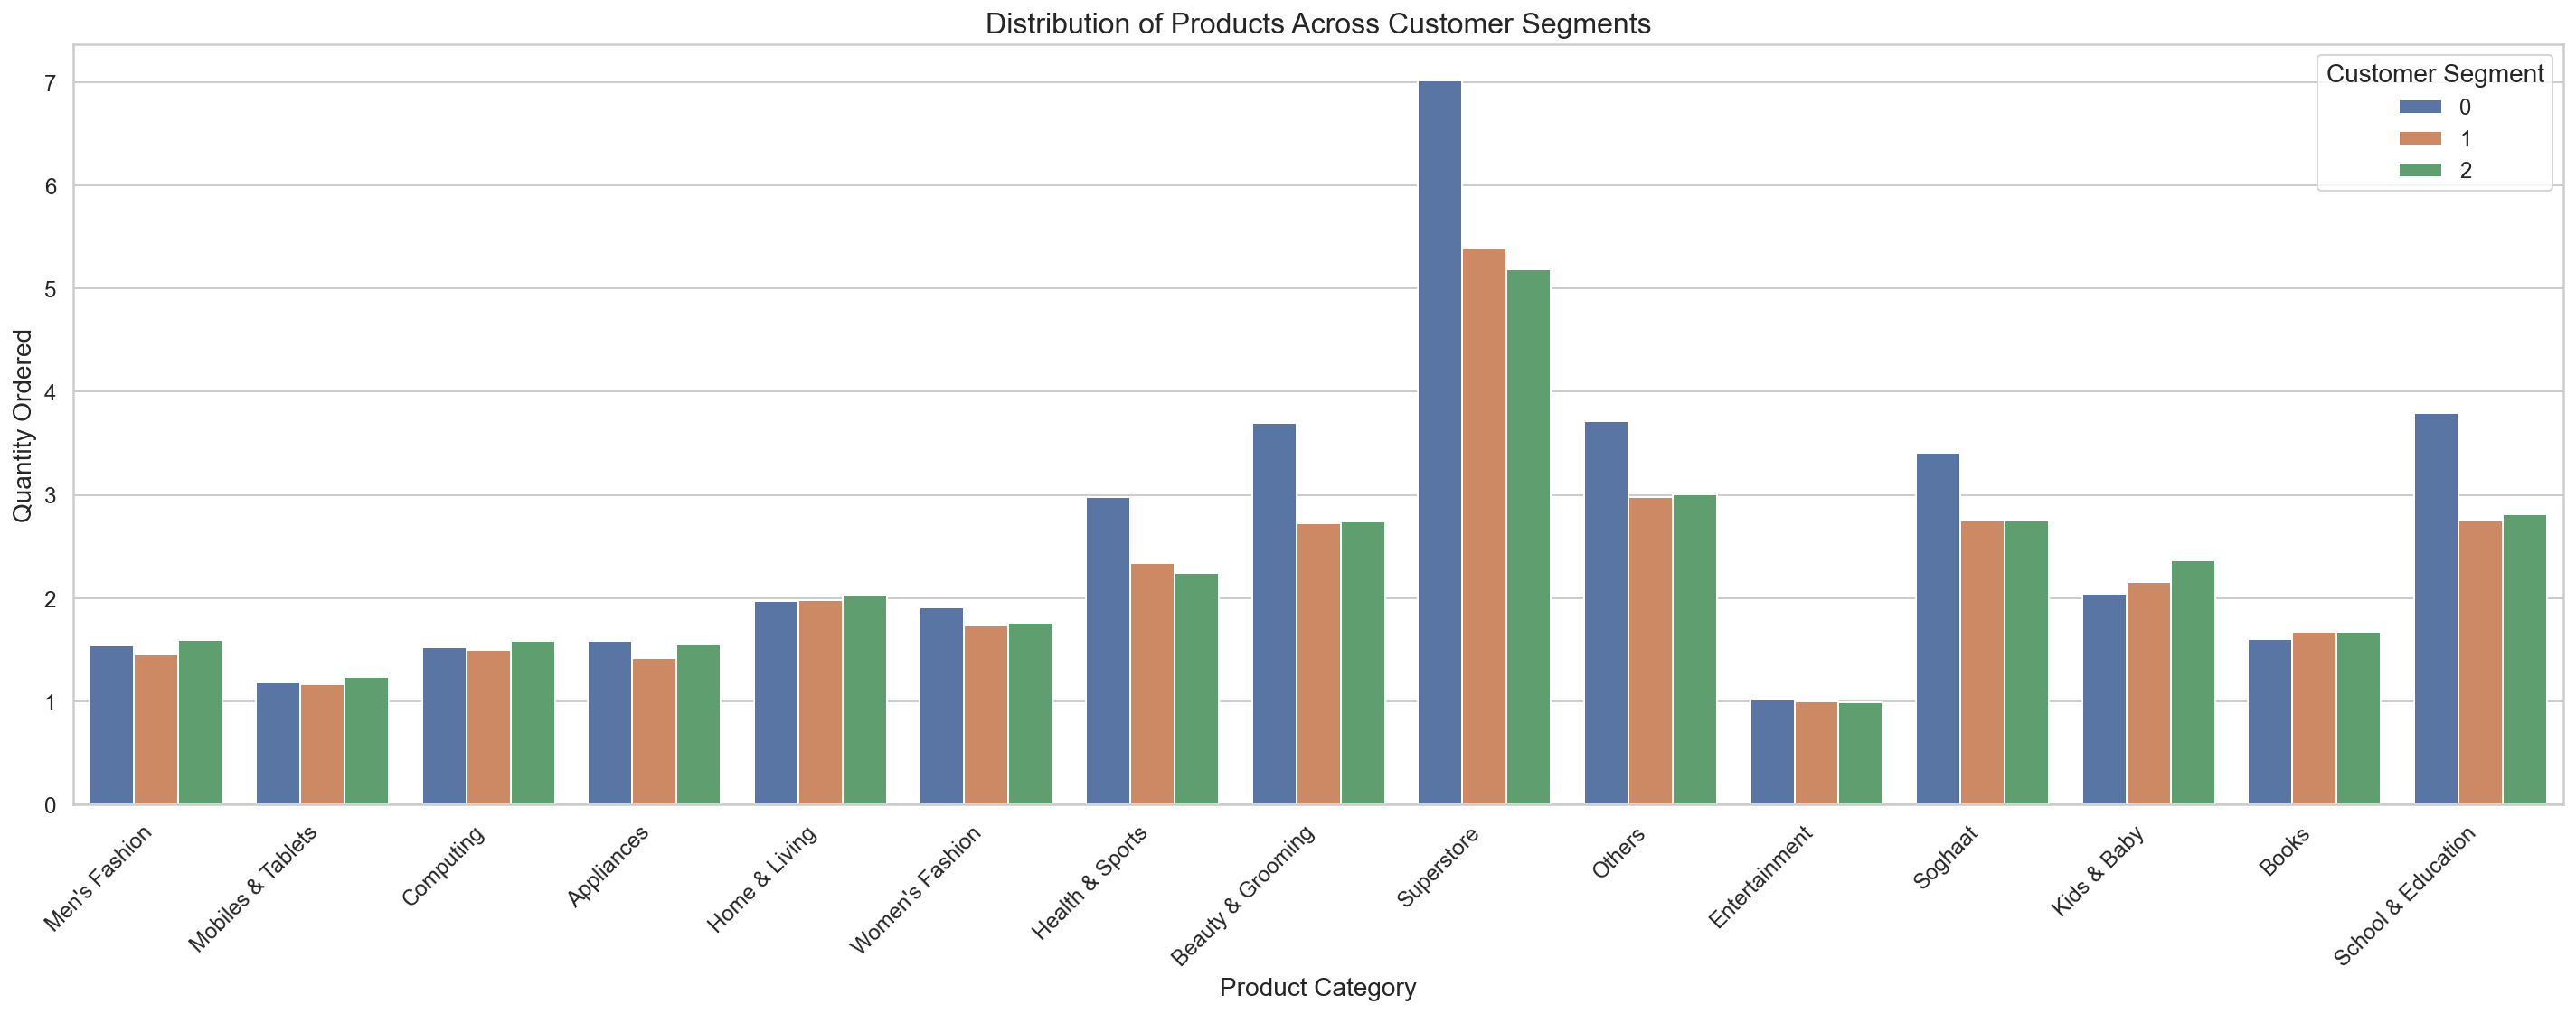

In [148]:
# Set up the figure size for better visibility
plt.figure(figsize=(20, 8))

# Create a bar plot with all categories visible
sns.barplot(
    x='category', 
    y='quantity_ordered', 
    hue='Segment', 
    data=product_data,
    ci=None  # Disable confidence intervals for cleaner visualization
)

# Customize the chart
plt.title('Distribution of Products Across Customer Segments', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Quantity Ordered', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')  # Rotate x-axis labels for visibility
plt.legend(title='Customer Segment', fontsize=12, title_fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

The chart illustrates the distribution of products ordered across different customer segments. It is evident that the **Superstore** and **School & Education** categories dominate the quantity of orders, particularly in **Segment 0** (blue), which appears to have the highest demand overall. Meanwhile, categories like **Health & Sports**, **Beauty & Grooming**, and **Soghaat** show balanced contributions across all segments, indicating consistent demand among customer types. In contrast, categories like **Entertainment** exhibit the lowest overall demand. These insights suggest the need for targeted promotions in high-demand categories while exploring strategies to boost engagement in underperforming categories.

---

<a  id="elasticity">
    
### 5.3.4. Price Elasticity Analytics
    
</a>

In [149]:
# Menghitung perubahan harga dan kuantitas dalam kelompok berdasarkan index shift
df['delta_price'] = df['price'].diff()
df['delta_quantity'] = df['quantity_ordered'].diff()

# Menghitung persentase perubahan
df['percent_change_price'] = df['delta_price'] / df['price'].shift(1) * 100
df['percent_change_quantity'] = df['delta_quantity'] / df['quantity_ordered'].shift(1) * 100

# Menghitung elastisitas harga
df['price_elasticity'] = df['percent_change_quantity'] / df['percent_change_price']

# Mengelompokkan data dan menghitung rata-rata elastisitas harga
grouped_elasticity = df.groupby('price').agg(
    avg_quantity=('quantity_ordered', 'mean'),
    avg_total_sales=('total_sales', 'mean'),
    avg_price_elasticity=('price_elasticity', 'mean')
).reset_index()

# Menambahkan kategori elastisitas
grouped_elasticity['elasticity_type'] = grouped_elasticity['avg_price_elasticity'].apply(
    lambda x: 'Elastic (>1)' if abs(x) > 1 else ('Inelastic (<1)' if abs(x) < 1 else 'Unit Elastic (=1)')
)
grouped_elasticity

price  avg_quantity  avg_total_sales  avg_price_elasticity  \
0          0.000      1.942821         0.000000                   NaN   
1          0.010      1.533333         0.015333                   NaN   
2          0.011      1.000000         0.011000              0.000000   
3          0.020      1.875000         0.037500              0.040816   
4          0.080      1.555556         0.124444             -0.007937   
...          ...           ...              ...                   ...   
7556   29166.700      1.000000     29166.700000             -0.001453   
7557   30797.000      0.000000         0.000000                   NaN   
7558   32000.000      1.000000     32000.000000             -0.000431   
7559   51597.500      0.000000         0.000000             -0.036844   
7560  101262.590      1.000000    101262.590000             -0.000236   

        elasticity_type  
0     Unit Elastic (=1)  
1     Unit Elastic (=1)  
2        Inelastic (<1)  
3        Inelastic (<1)  
4        Inelastic (<1)  
...                 ...  
7556     Inelastic (<1)  
7557  Unit Elastic (=1)  
7558     Inelastic (<1)  
7559     Inelastic (<1)  
7560     Inelastic (<1)  

[7561 rows x 5 columns]

In [150]:
#grouped_elasticity.to_excel('D:/Portofolio_Project/grouped_elasticity.xlsx')
#grouped_elasticity.to_csv('D:/Portofolio_Project/grouped_elasticity.csv', index=False)

In [151]:
# Fitting a linear regression model to estimate price elasticity
X = df[['price']]
y = df['total_sales']
model = LinearRegression()
model.fit(X, y)

# Predict sales for a new price
predicted_sales = model.predict([[20]])  # Predict sales at price $20

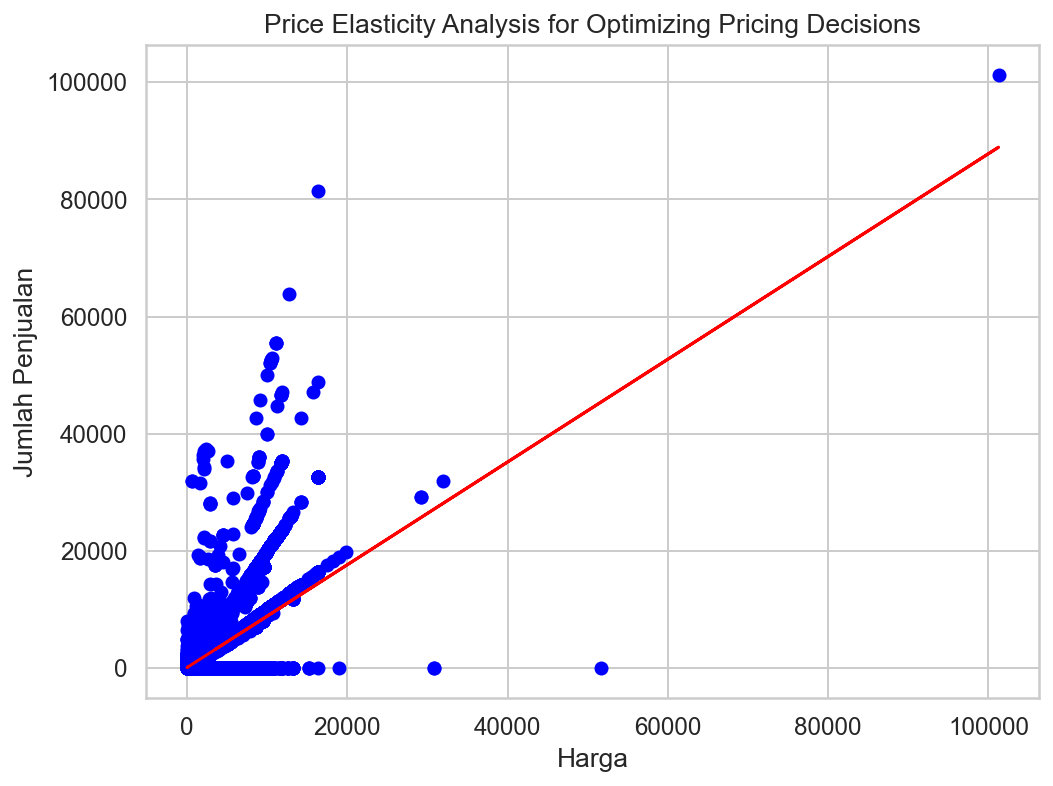

Prediksi penjualan pada harga $20: 86


In [152]:
# Plotting the sales vs price
plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['total_sales'], color='blue')
plt.plot(df['price'], model.predict(X), color='red')
plt.title('Price Elasticity Analysis for Optimizing Pricing Decisions')
plt.xlabel('Harga')
plt.ylabel('Jumlah Penjualan')
plt.show()

print(f"Prediksi penjualan pada harga $20: {predicted_sales[0]:,.0f}")

This graph shows the relationship between price and the number of sales made. Each blue dot is historical sales data, while the red line is the predicted sales trend based on regression analysis. From this result, we see that at a price of $20, the estimated sales are around 86 units. To maximize revenue, we need to consider the balance between sales volume and optimal price. Is a price of 20 in line with our business target, or does a deeper analysis regarding profit margins need to be done?

---

#### Price Optimization

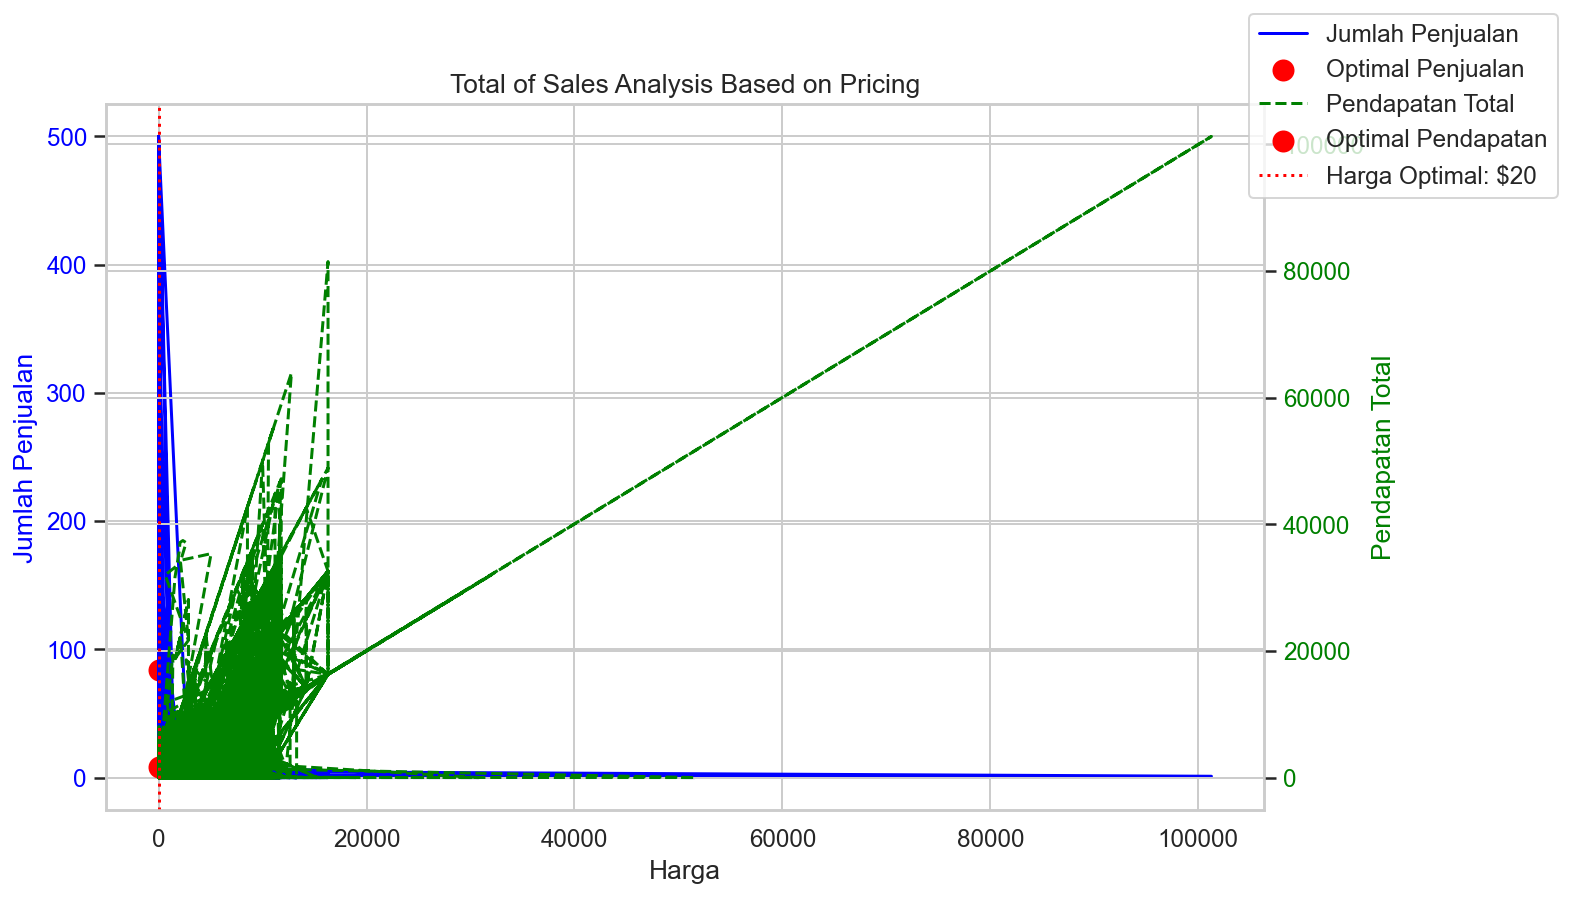

Pada harga $20, diprediksi jumlah penjualan adalah 84 unit.
Pendapatan total pada harga tersebut adalah $1680.


In [153]:
# Menghindari pendapatan negatif
penjualan = np.clip(df['quantity_ordered'], 0, None)
pendapatan = np.clip(df['total_sales'], 0, None)

# Plotting Grafik Penjualan dan Pendapatan
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Penjualan
ax1.plot(df['price'], penjualan, color='blue', label='Jumlah Penjualan')
ax1.set_xlabel('Harga')
ax1.set_ylabel('Jumlah Penjualan', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Tambahkan Plot Pendapatan di Axis Kedua
ax2 = ax1.twinx()
ax2.plot(df['price'], pendapatan, color='green', linestyle='--', label='Pendapatan Total')
ax2.set_ylabel('Pendapatan Total', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Titik Optimal (Contoh di Harga $20)
optimal_price = 20
optimal_sales = -0.8 * optimal_price + 100 # Ubah langsung ke jumlah penjualan yang diinginkan
optimal_revenue = optimal_price * optimal_sales

# Menambahkan Titik Optimal
ax1.scatter(optimal_price, optimal_sales, color='red', s=100, label='Optimal Penjualan')
ax2.scatter(optimal_price, optimal_revenue, color='red', s=100, label='Optimal Pendapatan')

# Tambahkan Garis dan Keterangan
plt.axvline(x=optimal_price, color='red', linestyle=':', label=f'Harga Optimal: ${optimal_price}')
plt.title('Total of Sales Analysis Based on Pricing')
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(1.1, 1.05))
plt.show()

# Menampilkan Hasil
print(f"Pada harga ${optimal_price}, diprediksi jumlah penjualan adalah {int(optimal_sales)} unit.")
print(f"Pendapatan total pada harga tersebut adalah ${int(optimal_revenue)}.")

Based on the initial analysis using a linear model, we see that sales decrease by 0.8 units for every $1 increase. With this approach, we can determine the optimal price that not only considers sales volume but also profit margins.

---

<a  id="preference">
    
### 5.3.5. Consumer Preference Analysis by Demographic Factors
    
</a>

In [154]:
# 1. Menentukan kategori usia langsung menggunakan np.select
conditions = [
    df['age'].between(15, 25, inclusive=True),
    df['age'].between(26, 35, inclusive=True),
    df['age'].between(36, 45, inclusive=True),
    df['age'].between(46, 55, inclusive=True),
    df['age'].between(56, 65, inclusive=True),
    df['age'].between(66, 75, inclusive=True),
    df['age'].between(76, 85, inclusive=True),
]

values = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Tambahkan kolom kategori usia ke dalam DataFrame
df['kategori_usia'] = np.select(conditions, values, default='Undefined')

In [155]:
df['keterangan_kategori_usia'] = df['kategori_usia']
df['keterangan_kategori_usia'].replace({'A': '15-25', 'B': '26-35', 'C': '36-45','D': '46-55',
                                        'E': '56-65', 'F': '66-75','G': '76-85'}, inplace=True)

In [156]:
# 2. Menghitung jumlah jenis kelamin per kategori usia menggunakan transform
df['jumlah_gender'] = df.groupby(['kategori_usia', 'Gender'])['Gender'].transform('count')

# Menampilkan hasil akhir
print("DataFrame dengan Kategori Usia dan Jumlah Gender:")
print(df.head())

DataFrame dengan Kategori Usia dan Jumlah Gender:
    order_id order_date    status   item_id                  sku  \
0  100354678 2020-10-01  received  574772.0   oasis_Oasis-064-36   
1  100354678 2020-10-01  received  574774.0      Fantastic_FT-48   
2  100354680 2020-10-01  complete  574777.0      mdeal_DMC-610-8   
3  100354680 2020-10-01  complete  574779.0   oasis_Oasis-061-36   
4  100367357 2020-11-13  received  595185.0  MEFNAR59C38B6CA08CD   

   quantity_ordered  price   value  discount_amount  total_sales  ...  \
0                20   89.9  1798.0              0.0       1798.0  ...   
1                10   19.0   190.0              0.0        190.0  ...   
2                 8  149.9  1199.2              0.0       1199.2  ...   
3                 8   79.9   639.2              0.0        639.2  ...   
4                 1   99.9    99.9              0.0         99.9  ...   

  default_order Segment delta_price  delta_quantity  percent_change_price  \
0   non_default       1  

In [157]:
# Validasi hasil dengan groupby
print("\nValidasi Jumlah Jenis Kelamin per Kategori Usia:")
print(df.groupby(['keterangan_kategori_usia', 'kategori_usia', 'Gender'])['Gender'].count())


Validasi Jumlah Jenis Kelamin per Kategori Usia:
keterangan_kategori_usia  kategori_usia  Gender
15-25                     A              F         19642
                                         M         19800
26-35                     B              F         23900
                                         M         24626
36-45                     C              F         24435
                                         M         25255
46-55                     D              F         24555
                                         M         26331
56-65                     E              F         23589
                                         M         25788
66-75                     F              F         24087
                                         M         24384
Name: Gender, dtype: int64


In [158]:
# 1. Groupby untuk menghitung jumlah berdasarkan kategori usia dan gender
grouped = df.groupby(['kategori_usia', 'keterangan_kategori_usia', 'Gender']).size().reset_index(name='count')

# 2. Pisahkan hasil untuk Gender F dan M
gender_F = grouped[grouped['Gender'] == 'F'][['kategori_usia', 'keterangan_kategori_usia', 'count']].rename(columns={'count': 'F'})
gender_M = grouped[grouped['Gender'] == 'M'][['kategori_usia', 'count']].rename(columns={'count': 'M'})

# 3. Gabungkan hasil Gender F dan M
result_gender = gender_F.merge(gender_M, on='kategori_usia', how='outer')

# 4. Tambahkan kolom Total
result_gender['Total'] = result_gender['F'] + result_gender['M']

# 5. Menambahkan kembali kolom keterangan_kategori_usia
result_gender = result_gender[['kategori_usia', 'keterangan_kategori_usia', 'F', 'M', 'Total']]

# 6. Mengisi nilai NaN jika ada
result_gender = result_gender.fillna(0)

# Menampilkan hasil akhir
print("DataFrame Final:")
print(result_gender)

DataFrame Final:
  kategori_usia keterangan_kategori_usia      F      M  Total
0             A                    15-25  19642  19800  39442
1             B                    26-35  23900  24626  48526
2             C                    36-45  24435  25255  49690
3             D                    46-55  24555  26331  50886
4             E                    56-65  23589  25788  49377
5             F                    66-75  24087  24384  48471


In [159]:
#result_gender.to_excel('D:/Portofolio_Project/result_gender.xlsx')
#result_gender.to_csv('D:/Portofolio_Project/result_gender.csv', index=False)

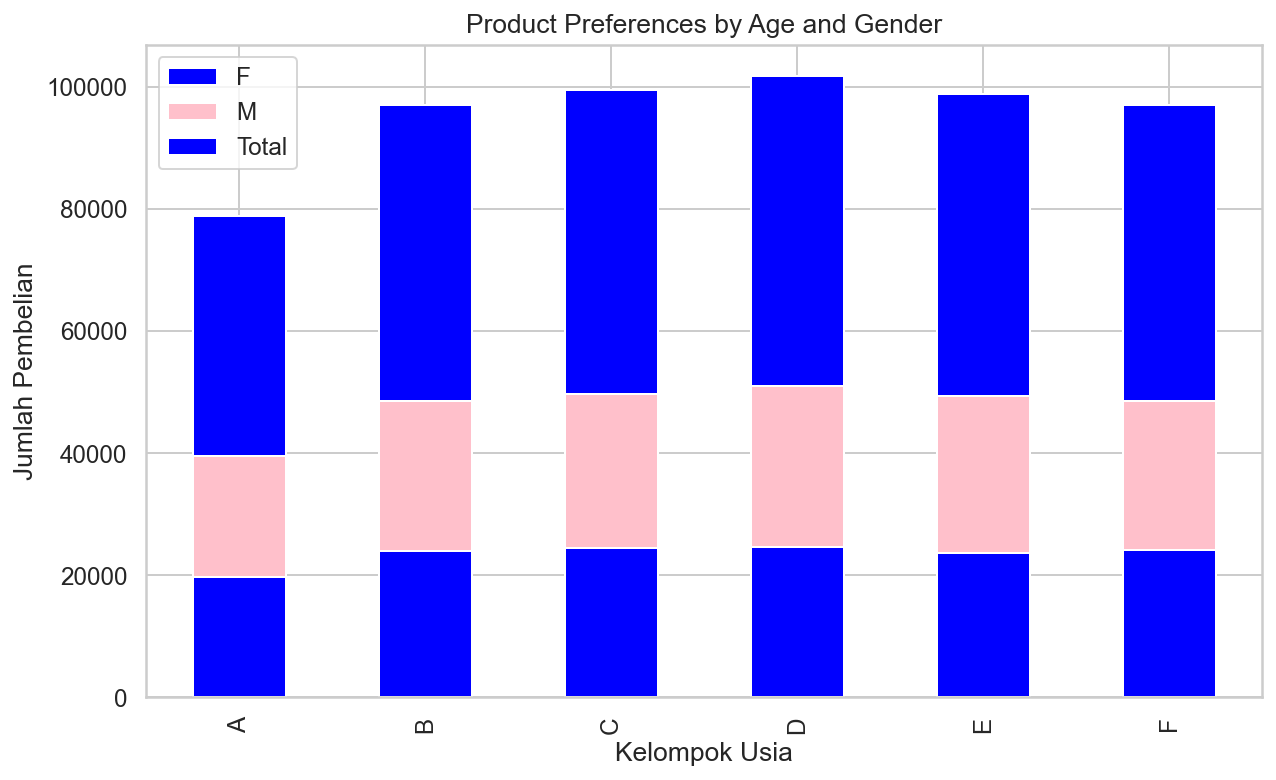

In [160]:
# Plotting preference by age and gender
result_gender.set_index('kategori_usia').plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'pink'])
plt.title('Product Preferences by Age and Gender')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Pembelian')
plt.show()

**Using function & pivot:**

In [161]:
# 1. Membuat kolom kategori usia
def kategorikan_usia(usia):
    if 15 <= usia <= 25:
        return 'A'
    elif 26 <= usia <= 35:
        return 'B'
    elif 36 <= usia <= 45:
        return 'C'
    elif 46 <= usia <= 55:
        return 'D'
    elif 56 <= usia <= 65:
        return 'E'
    elif 66 <= usia <= 75:
        return 'F'
    elif 76 <= usia <= 85:
        return 'G'
    else:
        return 'Undefined'

df['age_category'] = df['age'].apply(kategorikan_usia)

In [162]:
# 4. Hitung jumlah berdasarkan kategori usia dan gender
pivot_table = df.pivot_table(
    index='age_category',
    columns='Gender',
    aggfunc='size',
    fill_value=0
)

In [163]:
# 5. Tambahkan kolom Total
pivot_table['Total'] = pivot_table.sum(axis=1)

# 6. Reset index jika ingin hasil dalam bentuk DataFrame datar
pivot_table = pivot_table.reset_index()

# Dictionary untuk keterangan kategori usia
keterangan_usia = {
    'A': '15-25 tahun',
    'B': '26-35 tahun',
    'C': '36-45 tahun',
    'D': '46-55 tahun',
    'E': '56-65 tahun',
    'F': '66-75 tahun',
    'G': '76-85 tahun',
    'H': 'Di luar kategori'
}

# Tambahkan kolom keterangan usia dengan memetakan dictionary
pivot_table['Keterangan_Usia'] = pivot_table['age_category'].map(keterangan_usia)

# 7. Menampilkan hasil
print("Pivot Table:")
print(pivot_table)

Pivot Table:
Gender age_category      F      M  Total Keterangan_Usia
0                 A  19642  19800  39442     15-25 tahun
1                 B  23900  24626  48526     26-35 tahun
2                 C  24435  25255  49690     36-45 tahun
3                 D  24555  26331  50886     46-55 tahun
4                 E  23589  25788  49377     56-65 tahun
5                 F  24087  24384  48471     66-75 tahun


In [164]:
categories = pivot_table[['age_category', 'Keterangan_Usia', 'F', 'M', 'Total', ]]
categories

Gender age_category Keterangan_Usia      F      M  Total
0                 A     15-25 tahun  19642  19800  39442
1                 B     26-35 tahun  23900  24626  48526
2                 C     36-45 tahun  24435  25255  49690
3                 D     46-55 tahun  24555  26331  50886
4                 E     56-65 tahun  23589  25788  49377
5                 F     66-75 tahun  24087  24384  48471

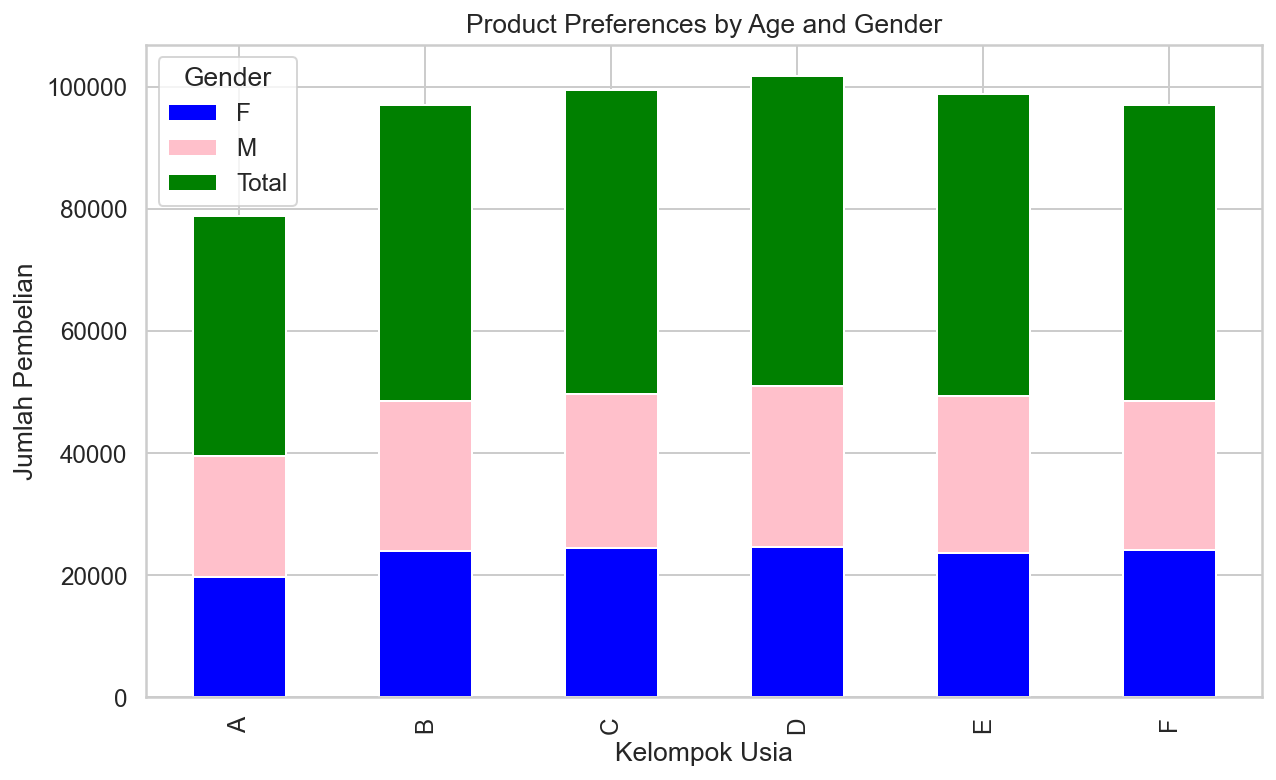

In [165]:
# Plotting preference by age and gender
categories.set_index('age_category').plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['blue', 'pink', 'green'])  # Warna: F (blue), M (pink), Total (green)
plt.title('Product Preferences by Age and Gender')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Pembelian')
plt.show()

In [166]:
#print(pivot_table.columns)
#pivot_table = pivot_table.reset_index(drop=True).rename_axis(None, axis=1)

**Using clustered bar chart to makes it easy to compare the number of purchases between men (M) and women (F) for each age group**:


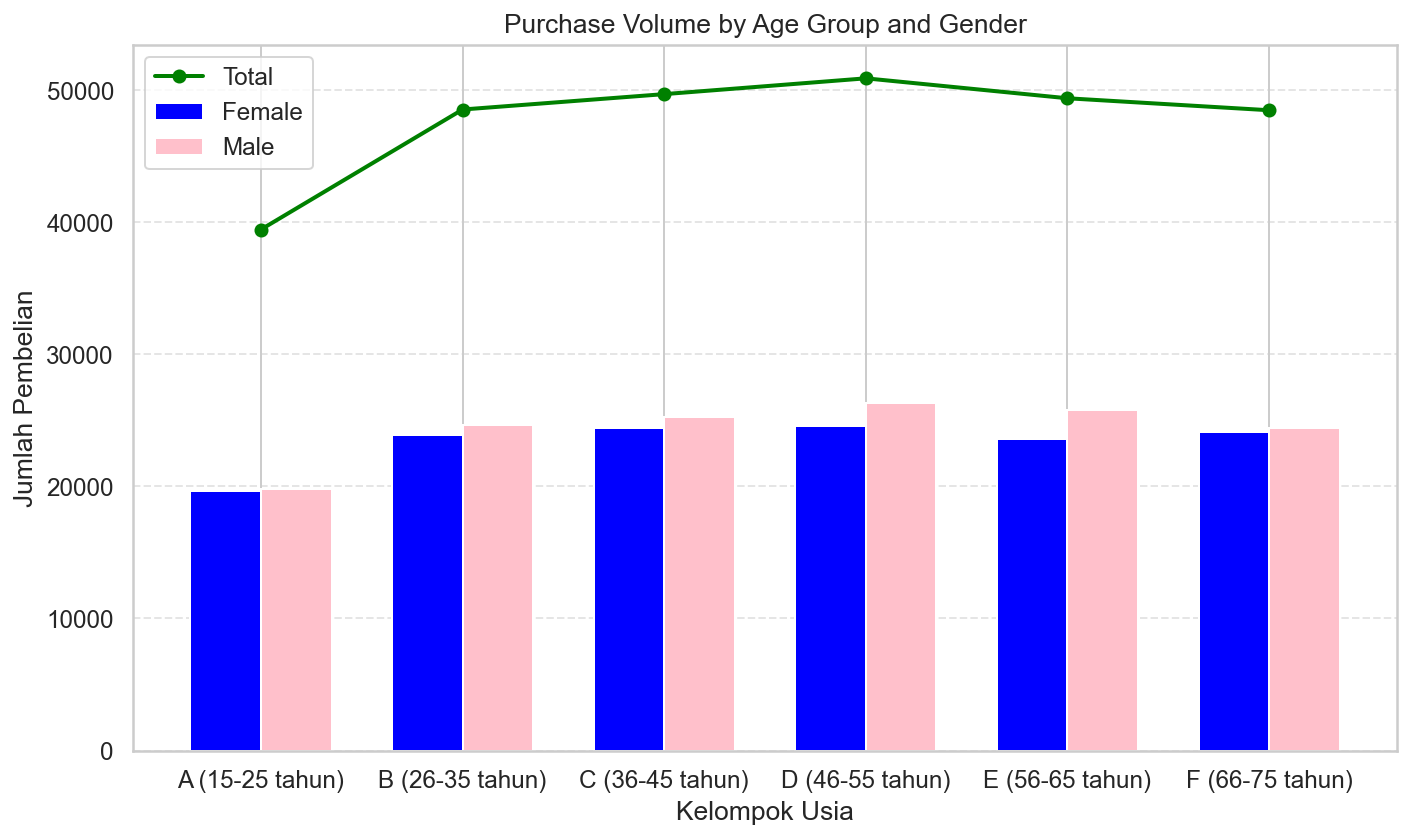

In [167]:
# Lokasi X untuk kategori usia
x = np.arange(len(categories['age_category']))

# Lebar bar
width = 0.35

# Plot Visualisasi
plt.figure(figsize=(10, 6))

# Bar chart untuk Female (F)
plt.bar(x - width/2, categories['F'], width, label='Female', color='blue')

# Bar chart untuk Male (M)
plt.bar(x + width/2, categories['M'], width, label='Male', color='pink')

# Menambahkan total pembelian sebagai line chart
plt.plot(x, categories['Total'], marker='o', linestyle='-', color='green', linewidth=2, label='Total')

# Menambahkan label sumbu dan judul
plt.title('Purchase Volume by Age Group and Gender')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Pembelian')
plt.xticks(x, categories['age_category'] + ' (' + categories['Keterangan_Usia'] + ')')  # Label sumbu X

# Menambahkan grid dan legenda
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menampilkan plot
plt.tight_layout()
plt.show()

**Using line chart for total:**

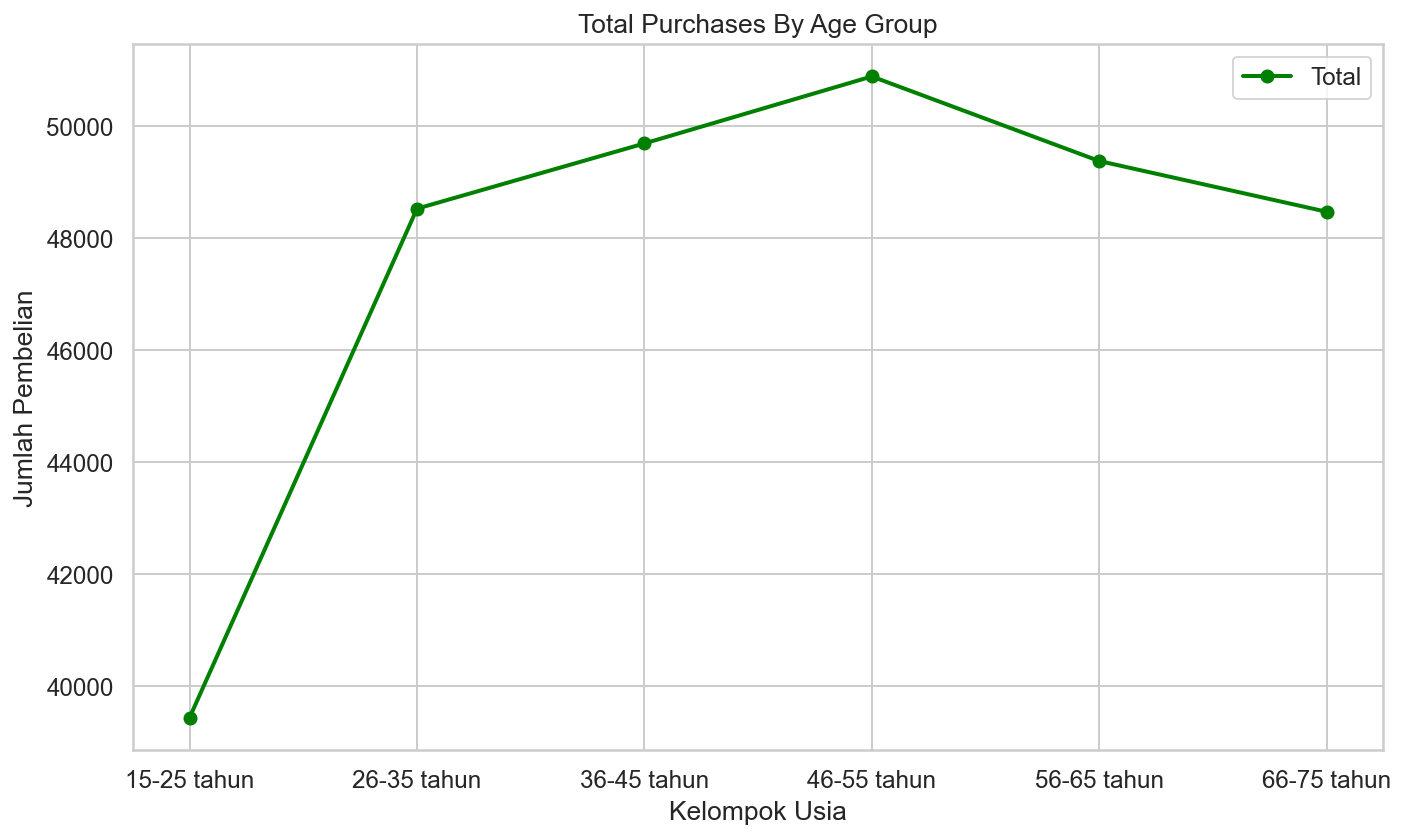

In [168]:
# Line chart untuk Total Pembelian
plt.figure(figsize=(10, 6))
plt.plot(categories['age_category'], categories['Total'], marker='o', linestyle='-', color='green', linewidth=2, label='Total')

# Menambahkan label
plt.title('Total Purchases By Age Group')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Pembelian')
plt.xticks(x, ['15-25 tahun', '26-35 tahun', '36-45 tahun', '46-55 tahun', '56-65 tahun', '66-75 tahun'])
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

From this analysis, we can see that the 46-55 age group (category D) is the most active group in purchasing products, with men dominating purchases across all age groups. This gives us insight to target this age group with a more specific marketing strategy and focus on the male audience.

---

<a  id="purchasing">
    
### 5.3.6. Analyzing Consumer Purchasing Trends Over Time
    
</a>

In [169]:
# 1. Menggunakan pivot_table untuk menghitung jumlah produk per bulan
pivot_table = df.pivot_table(
    index='bulan',          # Group berdasarkan bulan
    columns='category',      # Setiap jenis produk jadi kolom
    values='quantity_ordered',      # Data yang dihitung (jumlah pembelian)
    aggfunc='sum',          # Fungsi agregasi untuk menjumlahkan pembelian
    fill_value=0            # Ganti NaN dengan 0 jika tidak ada data
)

In [170]:
# 2. Reset index agar kolom 'Month' menjadi kolom biasa, bukan index
trend_data = pivot_table.reset_index()

In [171]:
# 3. Rename kolom jika perlu agar tampil lebih rapi
trend_data.columns.name = None  # Hapus nama kolom pivot
trend_data.columns = ['bulan'] + [col for col in pivot_table.columns if col != 'bulan']

# 4. Menampilkan hasil
print("Monthly Purchase Recapitulation Results and Product Types:")
print(trend_data)

Monthly Purchase Recapitulation Results and Product Types:
      bulan  Appliances  Beauty & Grooming  Books  Computing  Entertainment  \
0   2020-10         754               1234     82        209            436   
1   2020-11         945               1499    143       1296           1846   
2   2020-12       17434               8607    179       3348           5319   
3   2021-01        2256               7548    115        595            370   
4   2021-02        1281               4934    127        400            278   
5   2021-03        6760               5441    106       1465           2306   
6   2021-04        5089               4501    109       1715           2503   
7   2021-05        1553               2379     62        498            408   
8   2021-06        6448               6260    310       1200           2303   
9   2021-07        2068               5183     38        637            442   
10  2021-08        1211               1533     39        476            

In [172]:
#trend_data.to_excel('D:/Portofolio_Project/rekap_produk_per_bulan.xlsx')
#trend_data.to_csv('D:/Portofolio_Project/rekap_produk_per_bulan.csv', index=False)

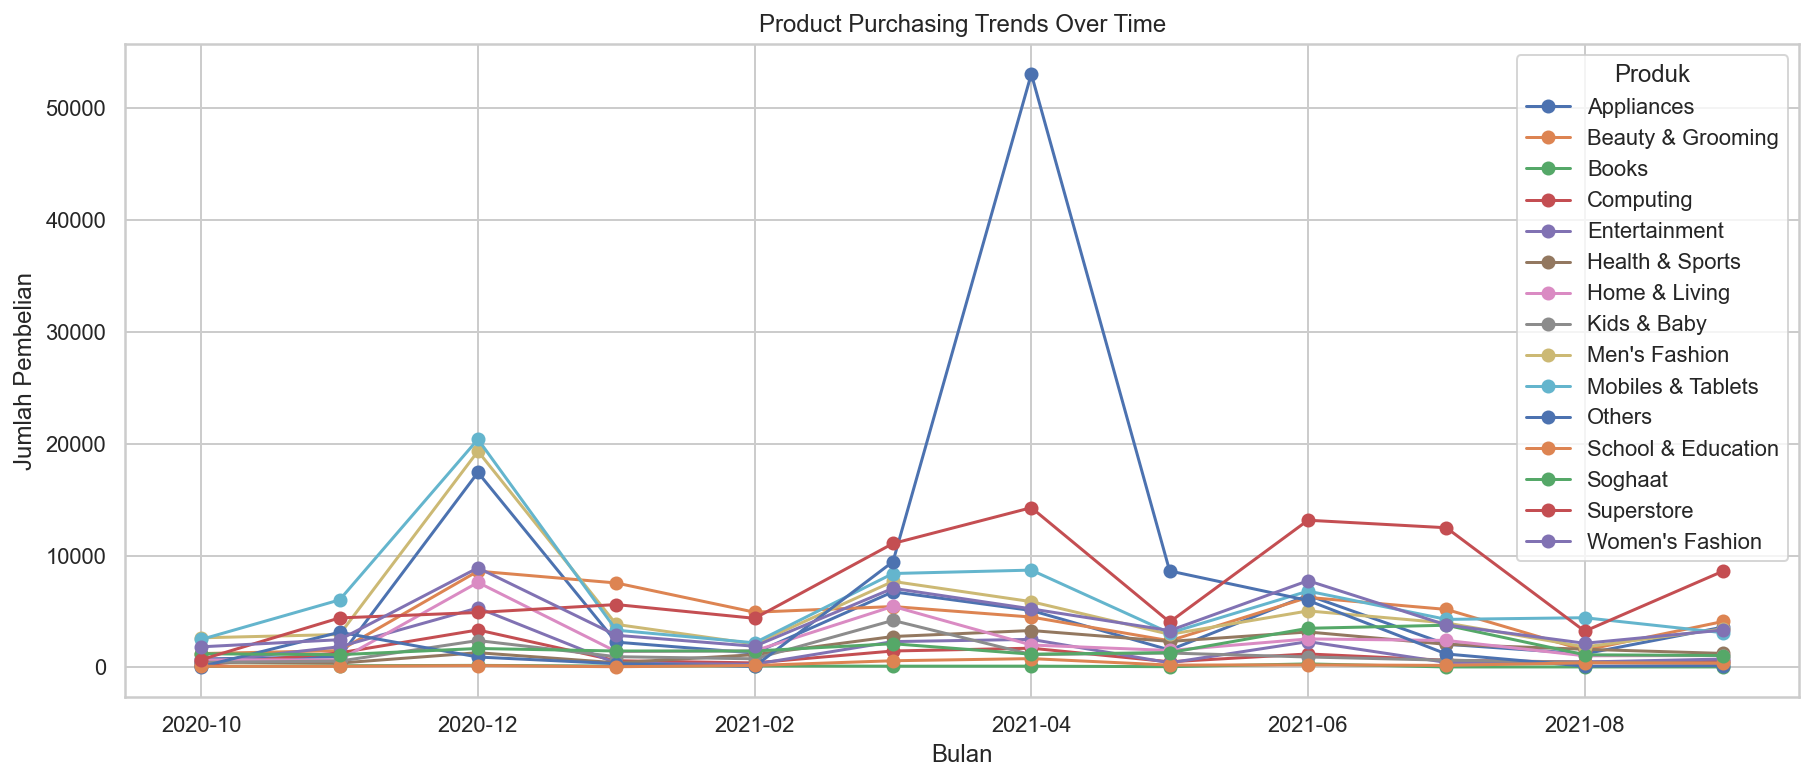

In [204]:
# Plotting trend of purchases over time
trend_data.set_index('bulan').plot(kind='line', figsize=(15, 6), marker='o')
plt.title('Product Purchasing Trends Over Time')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pembelian')
plt.legend(title='Produk')
plt.show()

**Analysis using groupby:**

In [174]:
# 1. Menghitung jumlah pembelian per produk dan per bulan
grouped = df.groupby(['bulan', 'category'])['quantity_ordered'].sum().reset_index()

# 2. Membuat DataFrame baru dalam format yang diinginkan
result = pd.DataFrame()

# Kolom bulan sebagai index utama
result['bulan'] = sorted(df['bulan'].unique())

In [175]:
# Menambahkan setiap jenis produk sebagai kolom
for product in df['category'].unique():
    product_sum = grouped[grouped['category'] == product][['bulan', 'quantity_ordered']]
    result = result.merge(product_sum, on='bulan', how='left').rename(columns={'quantity_ordered': product})

# Mengisi NaN dengan 0 jika tidak ada pembelian
result = result.fillna(0)

# Menampilkan hasil akhir
print("Monthly Purchase Recapitulation Results and Product Types:")
print(result)

Monthly Purchase Recapitulation Results and Product Types:
      bulan  Men's Fashion  Mobiles & Tablets  Computing  Appliances  \
0   2020-10           2643               2500        209         754   
1   2020-11           2941               6035       1296         945   
2   2020-12          19335              20401       3348       17434   
3   2021-01           3845               3328        595        2256   
4   2021-02           2088               2196        400        1281   
5   2021-03           7688               8395       1465        6760   
6   2021-04           5878               8699       1715        5089   
7   2021-05           2952               3074        498        1553   
8   2021-06           5049               6821       1200        6448   
9   2021-07           3974               4292        637        2068   
10  2021-08           1829               4441        476        1211   
11  2021-09           3439               3098        557        3602   

    

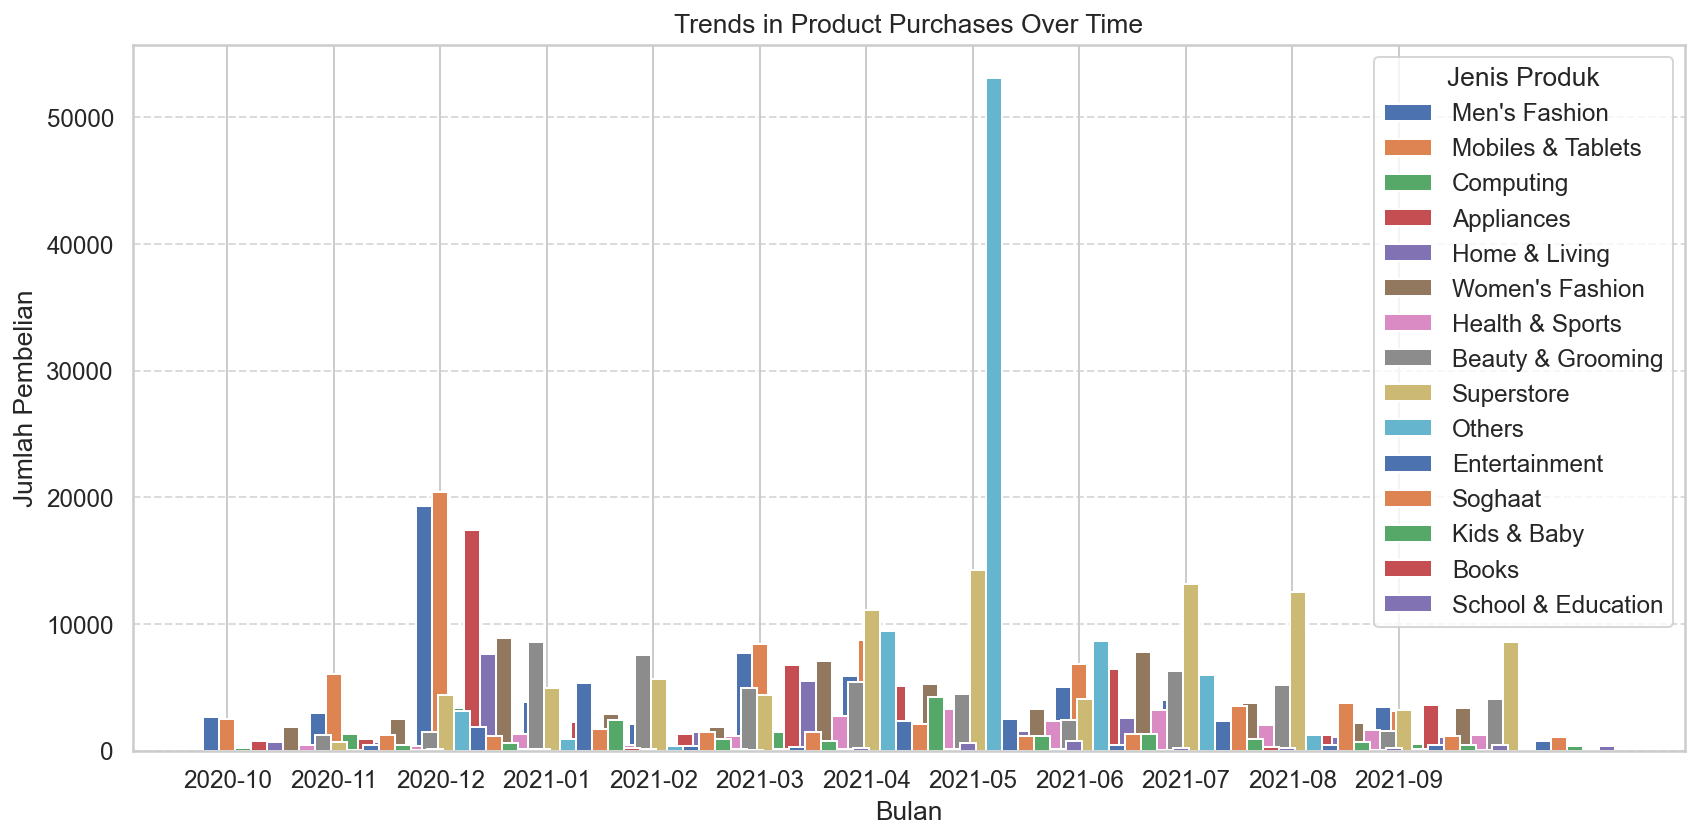

In [176]:
# 3. Visualisasi
# Plot hasil dalam bentuk bar chart
plt.figure(figsize=(12, 6))
x = np.arange(len(result['bulan']))

# Mengatur bar untuk setiap produk
width = 0.15
for i, product in enumerate(df['category'].unique()):
    plt.bar(x + i * width, result[product], width, label=product)

# Menambahkan label dan judul
plt.xticks(x + width, result['bulan'])
plt.title('Trends in Product Purchases Over Time')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pembelian')
plt.legend(title='Jenis Produk')

# Menampilkan grid dan plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Analysis without pivot & loop:**

In [177]:
# 1. Menghitung jumlah pembelian per bulan untuk setiap jenis produk
new_grouped = df.groupby(['bulan', 'category'])['quantity_ordered'].sum().unstack(fill_value=0)

# 2. Menambahkan kolom Total (jumlah keseluruhan produk di setiap bulan)
new_grouped['Total'] = new_grouped.sum(axis=1)

# 3. Reset index agar 'Month' menjadi kolom biasa
new_grouped = new_grouped.reset_index()

# Menampilkan hasil
print("Monthly Purchase Recapitulation Results and Product Types:")
print(new_grouped)

Monthly Purchase Recapitulation Results and Product Types:
category    bulan  Appliances  Beauty & Grooming  Books  Computing  \
0         2020-10         754               1234     82        209   
1         2020-11         945               1499    143       1296   
2         2020-12       17434               8607    179       3348   
3         2021-01        2256               7548    115        595   
4         2021-02        1281               4934    127        400   
5         2021-03        6760               5441    106       1465   
6         2021-04        5089               4501    109       1715   
7         2021-05        1553               2379     62        498   
8         2021-06        6448               6260    310       1200   
9         2021-07        2068               5183     38        637   
10        2021-08        1211               1533     39        476   
11        2021-09        3602               4104     39        557   

category  Entertainment  Healt

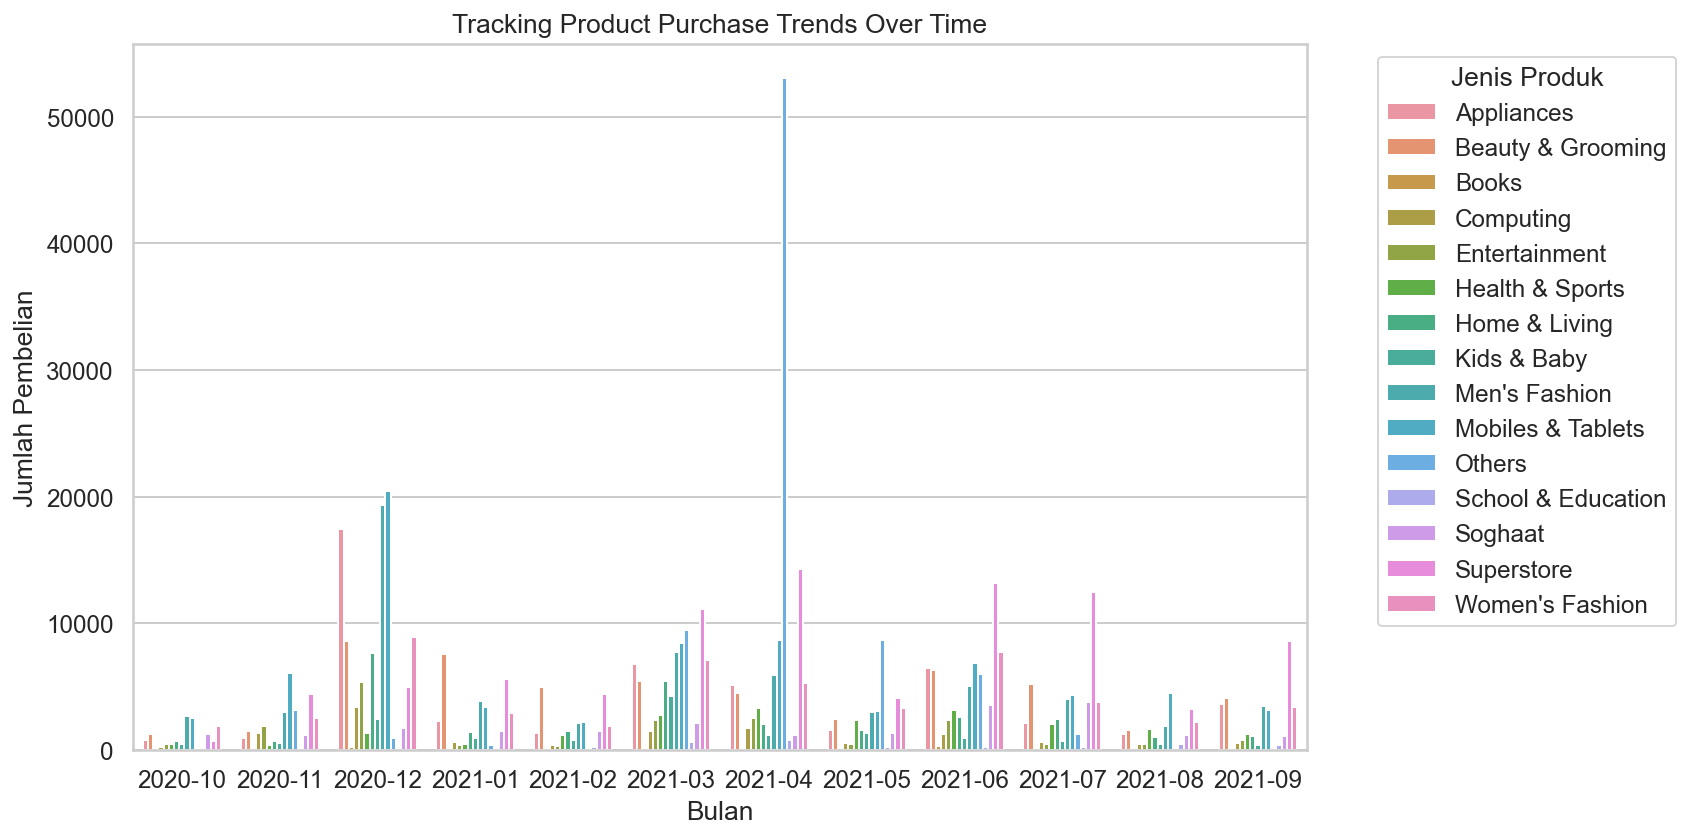

In [178]:
# Menghitung jumlah pembelian
vis_grouped = df.groupby(['bulan', 'category'])['quantity_ordered'].sum().reset_index()

# Visualisasi dengan Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=vis_grouped, 
    x='bulan', 
    y='quantity_ordered', 
    hue='category', 
    ci=None
)

# Menambahkan judul dan label
plt.title('Tracking Product Purchase Trends Over Time')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pembelian')
plt.legend(title='Jenis Produk', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan plot
plt.tight_layout()
plt.show()

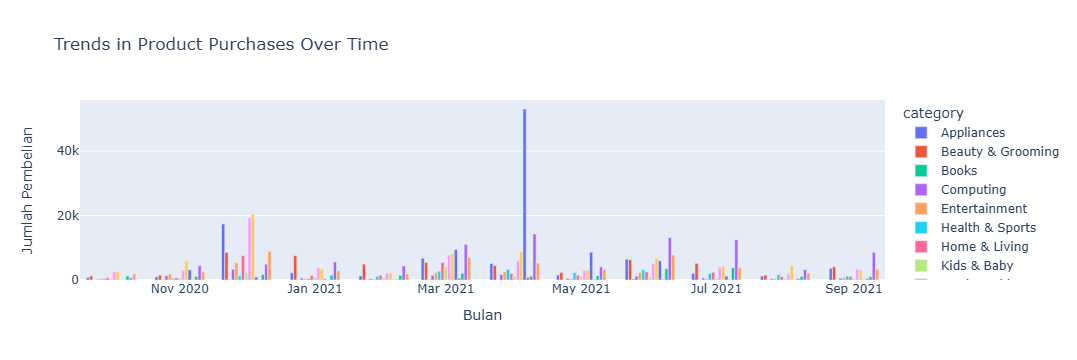

In [179]:
# Plot dengan Plotly
fig = px.bar(
    vis_grouped,
    x='bulan',
    y='quantity_ordered',
    color='category',
    title='Trends in Product Purchases Over Time',
    labels={'quantity_ordered': 'Jumlah Pembelian', 'bulan': 'Bulan'},
    barmode='group'  # Bar berkelompok text_auto=True    # Menampilkan label jumlah di atas bar
)

# Tampilkan plot
fig.show()

From this visualization, we can see the total purchases of each product category per month in the period from October 2020 to September 2021. Here are some key insights that we can draw:

A significant spike occurred in the 'Others' category in May 2021, with the number of purchases reaching more than 50,000 units. This was most likely influenced by major campaigns, special promotions, or seasonal factors that drove massive purchases.

The 'Men's Fashion', 'Mobiles & Tablets', and 'Books' categories showed consistent performance with peak sales in December 2020, which was likely triggered by increased year-end shopping activity.

Several categories such as 'Home & Living', 'Superstore', and 'Beauty & Grooming' experienced a gradual increasing trend in several months, indicating stable demand from customers.

However, there are categories such as 'Health & Sports' and 'School & Education' that performed lower and were relatively stagnant throughout this period. This could be an opportunity to implement a more specific marketing strategy to improve sales performance in the category.

Recommendation:
With these results, we can develop a data-driven strategy to:

Maximize leading categories such as 'Others' and 'Men's Fashion' in potential months.
Conduct an in-depth analysis of the May 2021 spike to identify drivers that can be replicated in future campaigns.
Increase focus on low-performing categories with approaches such as promotions, product bundling, or customer education campaigns.
With this approach, we can drive more optimal sales and increase contributions from various product categories.

---

In [180]:
# Plot menggunakan HvPlot
plot = vis_grouped.hvplot.bar(
    x='bulan', 
    y='quantity_ordered', 
    by='category', 
    title='Analyzing Product Buying Patterns Over Time',
    xlabel='Bulan', 
    ylabel='Jumlah Pembelian',
    stacked=False,  # Bar cluster
    legend='top', 
    width=800,
    height=500
)

# Tampilkan plot
plot

:Bars   [bulan,category]   (quantity_ordered)

### Top Product Trends Analysis (Top 5 Categories)

In [181]:
# 1. Menghitung total pembelian per kategori
top_categories = df.groupby('category')['quantity_ordered'].sum().sort_values(ascending=False).head(5)
print("Top 5 Product Categories with Highest Sales:")
print(top_categories)

Top 5 Product Categories with Highest Sales:
category
Superstore           86940
Others               83158
Mobiles & Tablets    73280
Men's Fashion        61661
Beauty & Grooming    53223
Name: quantity_ordered, dtype: int64


In [182]:
#top_categories.to_excel('D:/Portofolio_Project/top_categories.xlsx')
#top_categories.to_csv('D:/Portofolio_Project/top_categories.csv', index=False)

In [183]:
# 2. Filter DataFrame hanya untuk 5 kategori teratas
top_categories_df = df[df['category'].isin(top_categories.index)]

# Grouping untuk meringkas data
agg_data = top_categories_df.groupby(['bulan', 'category'], as_index=False)['quantity_ordered'].sum()

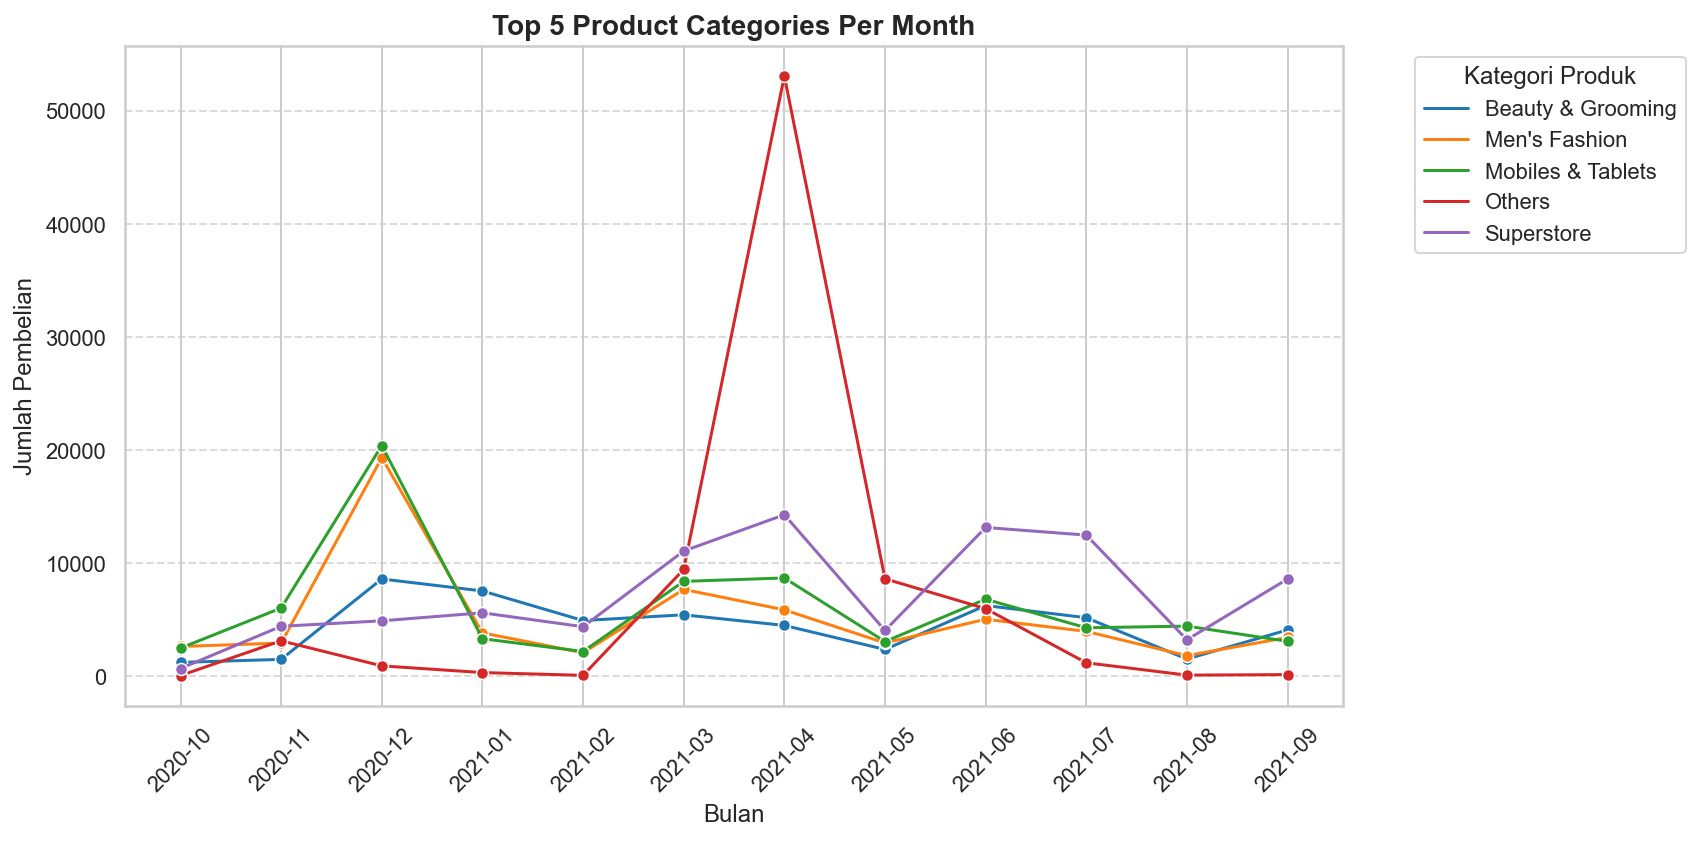

In [184]:
# 2. Visualisasi setelah agregasi
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.lineplot(
    data=agg_data, 
    x='bulan', 
    y='quantity_ordered', 
    hue='category', 
    marker='o', 
    palette='tab10'
)

# 3. Tambahkan detail visual
plt.title('Top 5 Product Categories Per Month', fontsize=14, fontweight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Pembelian', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan grid dan plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From the sales trend analysis, we can see the top 5 product categories with the best sales performance during the analyzed period. The 'Mobiles & Tablets' and 'Men's Fashion' categories showed peak performance in several months of December 2020, such as May 2021 and December 2020. The 'Others' category showed the highest performance in April 2021. Meanwhile, the 'Superstore' category had a significant spike in performance in certain months. The 'Beauty & Grooming' category experienced the most stable fluctuation throughout the year.

By understanding these trends, we can:

Optimize distribution and stock during peak periods. Conduct specific campaigns to maintain the performance of leading categories.

---

<a  id="geospatial">
    
### 5.3.7. Geospatial Distribution Analysis
    
</a>

In [185]:
# Aggregate data by Place Name
agg_geo_data = df.groupby(["Place Name", "County", "State"]).agg({
    "quantity_ordered": "sum",
    "total_sales": "sum"
}).reset_index()
agg_geo_data

Place Name         County State  quantity_ordered  total_sales
0             Aaron          Aaron    KY                 2      993.600
1        Aaronsburg         Centre    PA                 6     7461.656
2         Abbeville      Abbeville    SC                 2      149.000
3         Abbeville          Henry    AL                 3      219.700
4         Abbeville      Lafayette    MS                 3     1798.315
...             ...            ...   ...               ...          ...
24668  Zumbro Falls   Zumbro Falls    MN                12    11806.232
24669          Zuni  Isle of Wight    VA                 6      631.000
24670          Zuni       McKinley    NM                 7     3254.500
24671       Zwingle        Dubuque    IA                15     1880.950
24672        Zwolle         Sabine    LA                13    34427.670

[24673 rows x 5 columns]

In [186]:
#agg_geo_data.to_excel('D:/Portofolio_Project/agg_geo_data.xlsx')
#agg_geo_data.to_csv('D:/Portofolio_Project/agg_geo_data.csv', index=False)

In [187]:
# Load naturalearth_lowres data and filter for the USA
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us_map = world[world['iso_a3'] == 'USA']

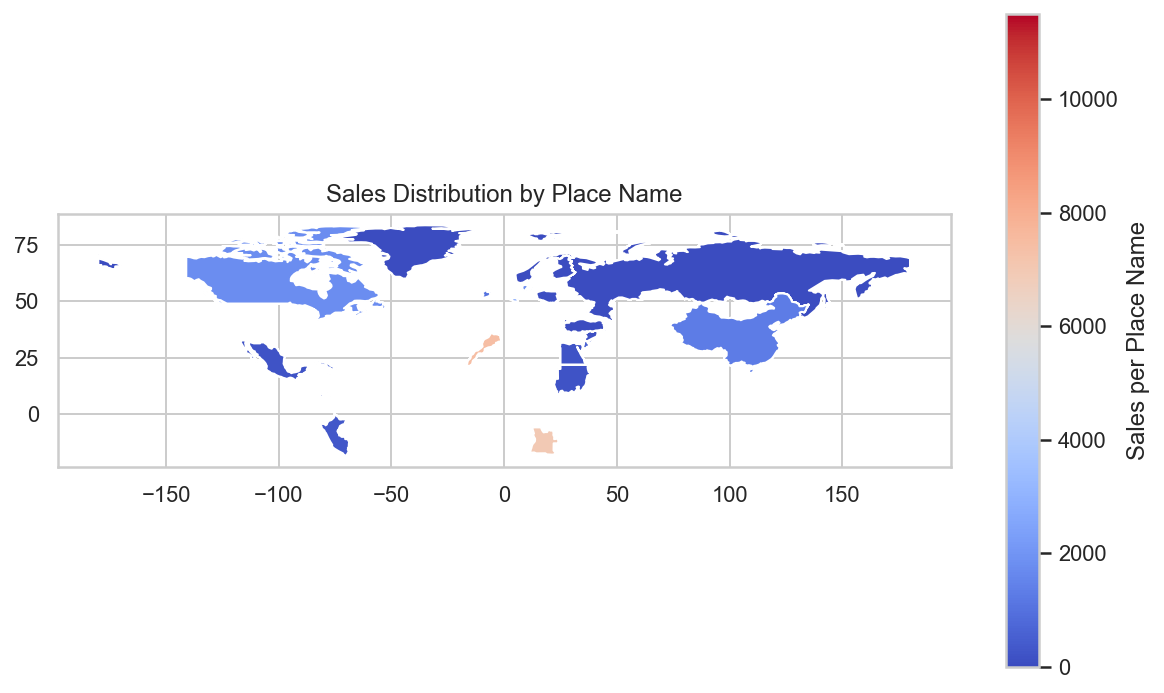

In [188]:
# Ensure Place Name matches the 'name' column in geo_data
sales_data = df[['total_sales', 'Place Name']]
sales_data['Place Name'] = sales_data['Place Name'].str.strip().str.title()

# Merge sales data with geo_data
geo_data = world.merge(sales_data, how="left", left_on="name", right_on="Place Name")

# Plotting the map
fig, ax = plt.subplots(figsize=(10, 6))
geo_data.plot(
    column='total_sales', 
    ax=ax, 
    legend=True, 
    cmap='coolwarm', 
    legend_kwds={'label': "Sales per Place Name"}
)
plt.title('Sales Distribution by Place Name')
plt.show()

The Global Sales Distribution chart showcases the global distribution of sales by Place Name, with the intensity of the color gradient reflecting sales volume. Regions with higher sales are represented in red, while lower sales are shaded in blue. This visualization offers a comprehensive overview of the geographical spread of sales performance, allowing stakeholders to identify high-performing areas and potential markets for growth. It also provides insights into how resources can be allocated strategically to regions with untapped potential.

---

<AxesSubplot:>

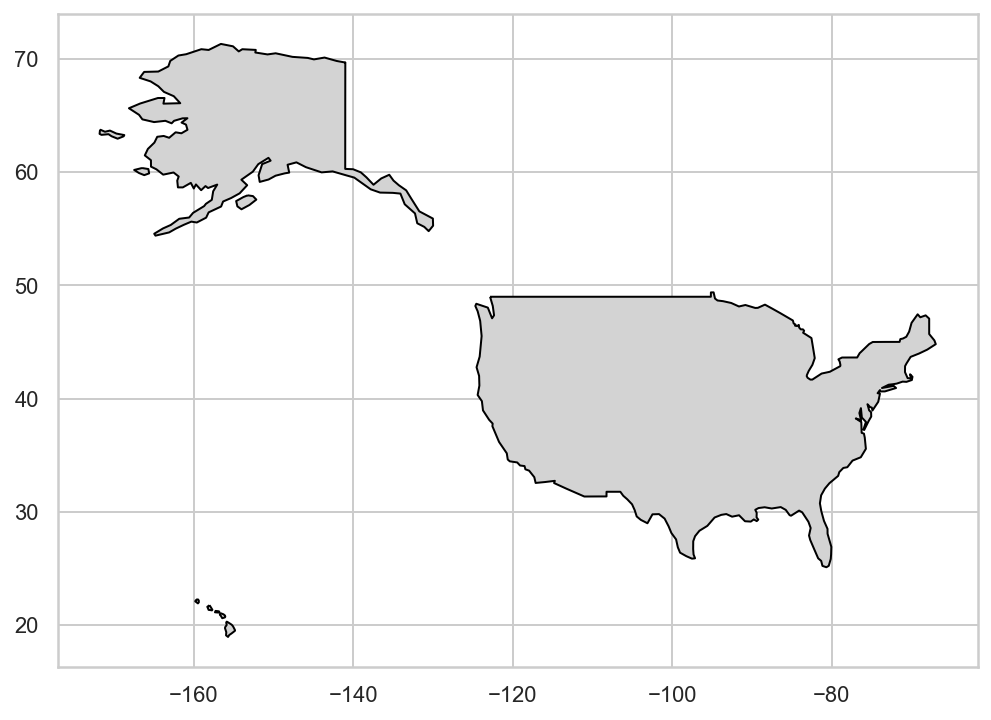

In [189]:
# Plot the US map
fig, ax = plt.subplots(figsize=(14, 6))
us_map.plot(ax=ax, color='lightgrey', edgecolor='black')

The chart highlights the geographic scope of the United States, serving as a baseline for understanding sales distribution across regions. This visual provides stakeholders with a clear focus on the US territories, ensuring that further analysis of sales trends and regional performance is contextualized within the country’s boundaries. The map serves as the foundation for evaluating location-specific sales metrics, enabling targeted decision-making for each state or region.

---

<a  id="sales">
    
### 5.3.8. Sales Trend Analysis by Time
    
</a>

In [190]:
# Analisis Tren Penjualan Bulanan (berdasarkan tahun dan bulan)
month_sale = df.groupby(['tahun', 'bulan'])['quantity_ordered'].sum().reset_index()

# Untuk analisis lebih lanjut, kita bisa menghitung perubahan penjualan bulanan (month-to-month change)
month_sale['change'] = month_sale['quantity_ordered'].pct_change() * 100
print(month_sale)

   tahun    bulan  quantity_ordered      change
0   2020  2020-10             13367         NaN
1   2020  2020-11             27585  106.366425
2   2020  2020-12            102520  271.651260
3   2021  2021-01             31178  -69.588373
4   2021  2021-02             22683  -27.246777
5   2021  2021-03             74889  230.154741
6   2021  2021-04            109497   46.212394
7   2021  2021-05             33531  -69.377243
8   2021  2021-06             65648   95.783007
9   2021  2021-07             43172  -34.237144
10  2021  2021-08             20145  -53.337812
11  2021  2021-09             31804   57.875403


In [191]:
#month_sale.to_excel('D:/Portofolio_Project/month_sale.xlsx')
#month_sale.to_csv('D:/Portofolio_Project/month_sale.csv', index=False)

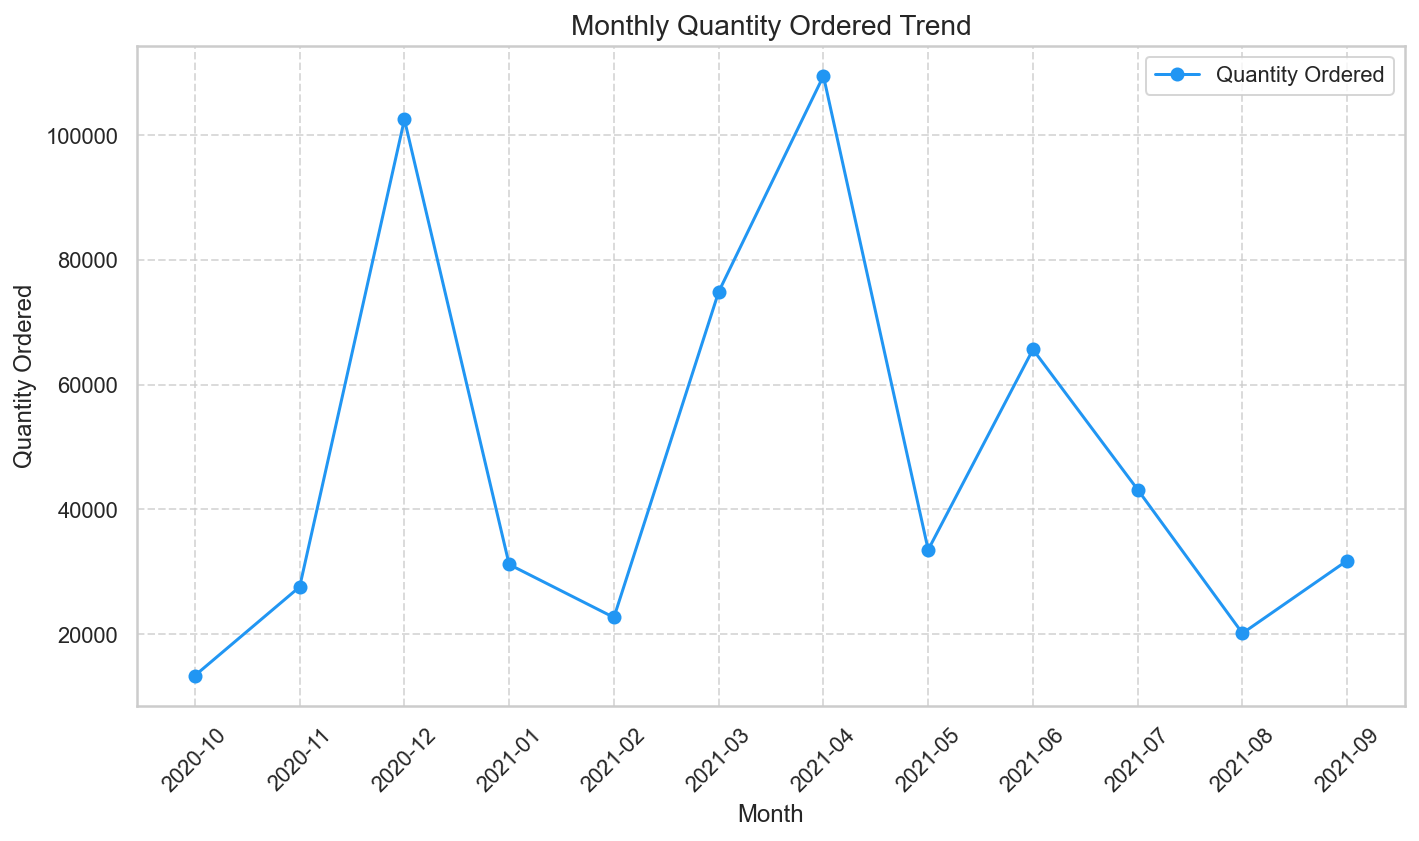

In [208]:
# Visualisasi
plt.figure(figsize=(10, 6))
plt.plot(month_sale['bulan'], month_sale['quantity_ordered'], marker='o', linestyle='-', color='#2196F3', label='Quantity Ordered')

# Menambahkan label dan judul
plt.title('Monthly Quantity Ordered Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Quantity Ordered', fontsize=12)
plt.xticks(rotation=45)
plt.legend()

# Menampilkan grid
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The monthly trend analysis shows significant fluctuations in quantity_ordered. A sharp increase is observed in December 2020 with 102,520 units, followed by a decline in January and February 2021. Notably, the highest growth occurred in March 2021 (74,889 units) and April 2021 (109,497 units), highlighting potential seasonal effects or promotions that boosted sales. Monitoring these trends can help optimize inventory management and identify key growth periods.

<a  id="performance">
    
### 5.3.9. Product Distribution Performance Analysis
    
</a>

In [193]:
# Analisis distribusi produk per cabang (menghitung total penjualan per cabang)
penjualan_per_daerah = df.groupby('Region')['quantity_ordered'].sum()

# Mencari cabang dengan distribusi produk rendah
daerah_dengan_penjualan_rendah = penjualan_per_daerah[penjualan_per_daerah < penjualan_per_daerah.quantile(0.25)]

# Analisis apakah ada masalah distribusi di wilayah tertentu
# Misalnya, kita memiliki kolom 'wilayah' untuk melihat distribusi penjualan berdasarkan lokasi geografis
penjualan_per_wilayah = df.groupby('Region')['quantity_ordered'].sum()

# Menganalisis perbedaan distribusi produk antara wilayah
penjualan_per_wilayah_sorted = penjualan_per_wilayah.sort_values(ascending=False)
print(penjualan_per_wilayah_sorted)

Region
South        199659
Midwest      171968
West         104634
Northeast     99758
Name: quantity_ordered, dtype: int64


In [194]:
#penjualan_per_wilayah_sorted.to_excel('D:/Portofolio_Project/penjualan_per_wilayah_sorted.xlsx')
#penjualan_per_wilayah_sorted.to_csv('D:/Portofolio_Project/penjualan_per_wilayah_sorted.csv', index=False)

In [195]:
penjualan_per_wilayah_sorted = penjualan_per_wilayah_sorted.reset_index()

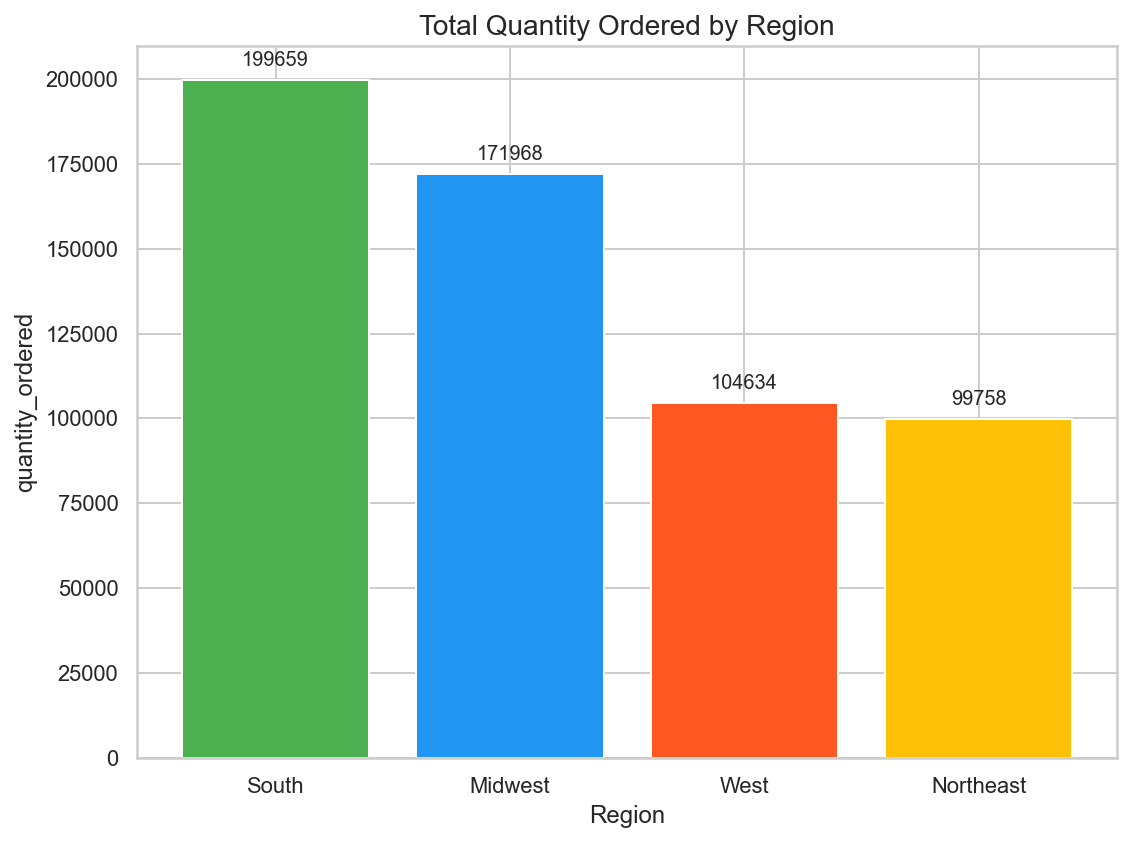

In [196]:
# Visualisasi
plt.figure(figsize=(8, 6))
plt.bar(penjualan_per_wilayah_sorted['Region'], penjualan_per_wilayah_sorted['quantity_ordered'], color=['#4CAF50', '#2196F3', '#FF5722', '#FFC107'])

# Menambahkan label dan judul
plt.title('Total Quantity Ordered by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('quantity_ordered', fontsize=12)

# Menambahkan nilai di atas bar
for i, val in enumerate(penjualan_per_wilayah_sorted['quantity_ordered']):
    plt.text(i, val + 3000, str(val), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Based on the regional analysis, the Southern region recorded the highest quantity ordered, reaching 199,659 units, followed by the Midwest with 171,968 units. The West and Northeast regions showed significantly lower values at 104,634 and 99,758 units, respectively. This indicates that the Southern and Midwest regions are the primary drivers of product demand, and targeted strategies can be implemented in these areas to maximize growth opportunities.

---

<a  id="variant">
    
### 5.3.10. Product Variant Sales Analysis
    
</a>

In [197]:
penjualan_varian = df.groupby(['Region', 'category'])['quantity_ordered'].sum().unstack().fillna(0)
penjualan_varian

category   Appliances  Beauty & Grooming  Books  Computing  Entertainment  \
Region                                                                      
Midwest         13906              14384    315       3229           4636   
Northeast        8536               8671    234       2098           2990   
South           18022              17903    534       4847           6334   
West             8937              12265    266       2222           3476   

category   Health & Sports  Home & Living  Kids & Baby  Men's Fashion  \
Region                                                                  
Midwest               8179           7950         3785          17845   
Northeast             2795           4762         2591          11588   
South                 6358           9891         5117          21497   
West                  2858           5237         2670          10731   

category   Mobiles & Tablets  Others  School & Education  Soghaat  Superstore  \
Region                                                                          
Midwest                19892   26624                 869     6325       30451   
Northeast              12816   13837                 544     4146       14473   
South                  27486   28456                1334     6551       26396   
West                   13086   14241                 594     4009       15620   

category   Women's Fashion  
Region                      
Midwest              13578  
Northeast             9677  
South                18933  
West                  8422

In [198]:
#penjualan_varian.to_excel('D:/Portofolio_Project/penjualan_varian.xlsx')
#penjualan_varian.to_csv('D:/Portofolio_Project/penjualan_varian.csv', index=False)

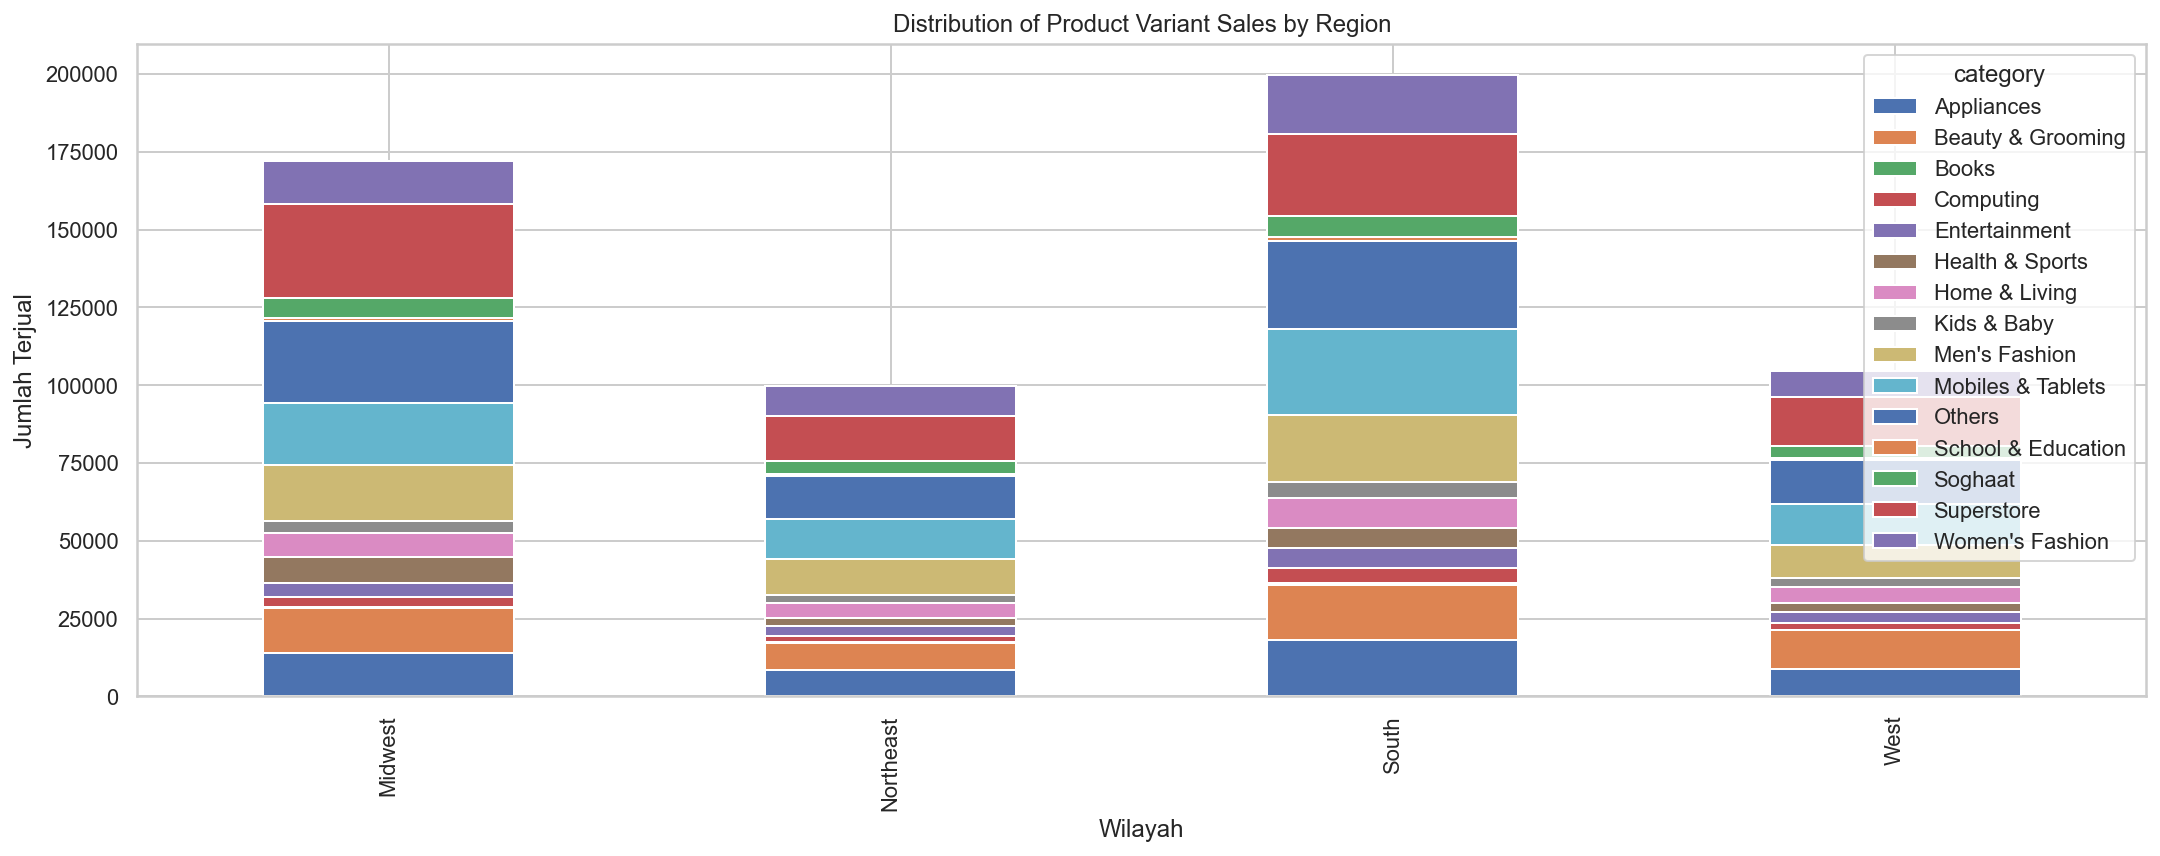

In [199]:
# 5.2: Visualisasi distribusi varian produk di setiap daerah
penjualan_varian.plot(kind='bar', stacked=True, figsize=(18, 6))
plt.title('Distribution of Product Variant Sales by Region')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Terjual')
plt.xticks(rotation=90)
plt.show()

The chart shows the distribution of product variant sales across regions, with the South recording the highest sales volume compared to other regions. The 'Entertainment' category makes the most significant contribution in the South, indicating that products in this category are highly popular. Meanwhile, the West and Northeast regions exhibit lower overall sales volumes, presenting opportunities to enhance marketing strategies in these areas. Other categories, such as 'Superstore' and 'Books,' continue to make strong contributions across nearly all regions.

<hr>
<a class="anchor" id="model">
    
# 6. Model
    
</a>

<a  id="optimization">

## 6.1. Demand Forecasting Optimization Using Exponential Smoothing

</a>

In [200]:
# Menggunakan Exponential Smoothing untuk peramalan permintaan
model_es = ExponentialSmoothing(df['quantity_ordered'], trend='add', seasonal='add', seasonal_periods=12)
model_es = model_es.fit()

# Melakukan prediksi untuk 12 bulan ke depan
forecast = model_es.forecast(steps=12)

# Menghitung kesalahan peramalan
mae = mean_absolute_error(df['quantity_ordered'][-12:], forecast)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.06585886631896525


The prediction error is calculated using the Mean Absolute Error (MAE), which shows the average absolute error between the actual data and the forecasted data. In this result, the MAE value is 0.0658, which shows that the average error of the model is very small, so the model has good accuracy. In conclusion, the model can be used to help inventory planning and product distribution.

---

In [201]:
save_ES_model = 'LR_joblib.sav'
dump(model_es, save_ES_model)

['LR_joblib.sav']

<hr>
<a class="anchor" id="about">
    
# 7. About the Author
    
</a>

## About the Author
- **Name**: Hanif K
- **Profession**: Data Analyst
- **Specialization**: Data Visualization, Predictive Analytics, and Business Intelligence
- **Purpose**: This project is part of my portfolio to showcase my skills in analyzing sales data and generating actionable insights.
- **Contact**:
  - GitHub: [Link](https://github.com/hanif-dev)
  - LinkedIn: [Link](https://www.linkedin.com/in/hanifkamil)
  - Email: [Link](hanifkamil86@gmail.com)

## Data Source
- The dataset was sourced from [Github](https://github.com/tranthienmy22/cohort-analysis-customer-retention/blob/main/sales.csv)

## Closing Remarks
Thank you for taking the time to review this analysis. I welcome any feedback or suggestions and look forward to collaborating on future projects in the field of data analytics.

---